In [1]:
import time
start_time = time.time()
import pandas as pd
import numpy as np
import feather
import matplotlib.pyplot as plt
import gc
from imblearn.over_sampling import SMOTE, SMOTENC, SVMSMOTE, ADASYN, BorderlineSMOTE, RandomOverSampler
from sklearn.metrics import *
from imblearn.metrics import classification_report_imbalanced
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance
from catboost import CatBoostClassifier
import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from collections import Counter
import configparser
import ast
import pickle
import sys
from multiprocessing import Pool, Process
import re
# from keras.layers import *
# from keras.models import *
# from keras.preprocessing.sequence import *
# from keras.regularizers import *
# from keras.optimizers import *
# from keras.callbacks import EarlyStopping
import warnings
from sklearn.preprocessing import PowerTransformer
from itertools import chain
from scipy.stats import skew, kurtosis

config = configparser.ConfigParser()
# config.read('/home/melgazar9/Trading/TD/Scripts/Trading-Scripts/CL/scripts/CL_30min_TRAIN-MODEL.ini')

config_path = config.read('/home/melgazar9/Trading/TD/Scripts/Trading-Scripts/CL/scripts/CL_10min_TRAIN-MODEL.ini'.format(sys.argv[1]))

print('**************** RUNNING', config['NAME']['product'], ' ****************')

train_start_date = config['PARAMS']['train_start_date']
train_end_date = config['PARAMS']['train_end_date']
val_start_date = config['PARAMS']['val_start_date']
val_end_date = config['PARAMS']['val_end_date']
test_start_date = config['PARAMS']['test_start_date']

threshold = float(config['PARAMS']['threshold'])
multiplier = float(config['PARAMS']['multiplier'])

strong_buy_actual = float(config['PARAMS']['strong_buy_actual'])
med_buy_actual = float(config['PARAMS']['med_buy_actual'])
no_trade_actual = float(config['PARAMS']['no_trade_actual'])
med_sell_actual = float(config['PARAMS']['med_sell_actual'])
strong_sell_actual = float(config['PARAMS']['strong_sell_actual'])
stop_actual = float(config['PARAMS']['stop_actual'])

strong_buy_HL = float(config['PARAMS']['strong_buy_HL'])
med_buy_HL = float(config['PARAMS']['med_buy_HL'])
no_trade_HL = float(config['PARAMS']['no_trade_HL'])
med_sell_HL = float(config['PARAMS']['med_sell_HL'])
strong_sell_HL = float(config['PARAMS']['strong_sell_HL'])
stop_HL = float(config['PARAMS']['stop_HL'])

strong_cap_actual = float(config['PARAMS']['strong_cap_actual'])
med_cap_actual = float(config['PARAMS']['med_cap_actual'])
strong_cap_HL = float(config['PARAMS']['strong_cap_HL'])
med_cap_HL = float(config['PARAMS']['med_cap_actual'])

min_prob0 = float(config['PARAMS']['min_prob0'])
min_prob1 = float(config['PARAMS']['min_prob1'])
min_prob3 = float(config['PARAMS']['min_prob3'])
min_prob4 = float(config['PARAMS']['min_prob4'])

min_prob_override0 = float(config['PARAMS']['min_prob_override0'])
min_prob_override1 = float(config['PARAMS']['min_prob_override1'])
min_prob_override3 = float(config['PARAMS']['min_prob_override3'])
min_prob_override4 = float(config['PARAMS']['min_prob_override4'])

Actual_Move = config['PARAMS']['Actual_Move_Name']
Actual_HighMove = config['PARAMS']['Actual_HighMove_Name']
Actual_LowMove = config['PARAMS']['Actual_LowMove_Name']


round_trip_fee = float(config['PARAMS']['round_trip_fee'])


if config['PARAMS']['HL_ON'] == 'TRUE':
    HL_ON = True
else:
    HL_ON = False

if config['PARAMS']['ACTUAL_ON'] == 'TRUE':
    ACTUAL_ON = True
else:
    ACTUAL_ON = False

**************** RUNNING CL_10min_  ****************


In [5]:
df.resample('1M').mean()

,1minClose,1minHigh,1minHighMove,1minLow,1minLowMove,1minMove,1minOpen,1minRange,1minVolume
Datetime,,,,,,,,,
2015-01-31,47.514804,47.543780,0.028588,47.486176,-0.029016,-3.874546e-04,47.515192,0.057604,184.857213
2015-02-28,50.864396,50.895193,0.030929,50.833987,-0.030277,1.322830e-04,50.864264,0.061206,220.784371
2015-03-31,48.177378,48.202370,0.024895,48.152453,-0.025022,-9.684088e-05,48.177475,0.049917,203.927315
2015-04-30,54.352358,54.377216,0.025288,54.327379,-0.024549,4.306686e-04,54.351927,0.049837,215.162104
2015-05-31,59.755469,59.777425,0.021829,59.733848,-0.021749,-1.275781e-04,59.755596,0.043578,170.016745
2015-06-30,59.828306,59.850684,0.022382,59.806323,-0.021979,4.259768e-06,59.828302,0.044361,160.269372
2015-07-31,51.562545,51.584046,0.021157,51.541543,-0.021346,-3.437618e-04,51.562889,0.042504,158.927931
2015-08-31,42.971104,42.992458,0.021596,42.950029,-0.020832,2.425095e-04,42.970862,0.042429,253.952947
2015-09-30,45.499409,45.524039,0.024588,45.475005,-0.024446,-4.232892e-05,45.499451,0.049033,242.426111


In [3]:
df.resample('1M').mean()

,1minOpen,1minHigh,1minLow,1minClose,1minVolume,1minRange,1minMove,1minLowMove,1minHighMove
Datetime,,,,,,,,,
2018-10-31,2761.231928,2761.875297,2760.585532,2761.230270,1755.789189,1.289766,-0.001658,-0.646396,0.643369
2018-11-30,2725.801505,2726.322042,2725.287406,2725.804777,1205.525460,1.034637,0.003272,-0.514099,0.520538
2018-12-31,2571.495758,2572.270580,2570.718147,2571.491842,1600.625615,1.552433,-0.003917,-0.777612,0.774821
2019-01-31,2588.457657,2588.970172,2587.949278,2588.459683,1120.610792,1.020894,0.002027,-0.508378,0.512516
2019-02-28,2761.636324,2761.952250,2761.319450,2761.638449,889.061120,0.632800,0.002125,-0.316874,0.315926
2019-03-31,2808.672623,2809.043487,2808.298736,2808.670423,1072.982560,0.744751,-0.002200,-0.373887,0.370864
2019-04-30,2910.737074,2910.992040,2910.479813,2910.738167,833.520014,0.512227,0.001093,-0.257262,0.254966
2019-05-31,2856.643525,2857.099022,2856.182678,2856.639053,1302.899298,0.916345,-0.004472,-0.460847,0.455497
2019-06-30,2892.613997,2892.964224,2892.270276,2892.618880,991.177236,0.693948,0.004883,-0.343721,0.350227


In [11]:
if config['PARAMS']['read_csv'] == 'TRUE':
    print('Reading CSV...')
    df = pd.read_csv(config['PATH']['filename'])
elif config['PARAMS']['read_feather'] == 'TRUE':
    print('Reading Feather File...')
    # df = pd.read_feather(config['PATH']['filename'], use_threads=32)
    df = feather.read_dataframe(config['PATH']['filename'])
elif config['PARAMS']['read_parquet'] == 'TRUE':
    df = pd.read_parquet(config['PATH']['filename'])


try:
    df.set_index('Datetime', inplace=True)
except KeyError:
    print('Datetime index is already set!')
    pass

df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)
df.index = df.index.tz_localize('utc').tz_convert('US/Central')
df.dropna(axis=0, inplace=True)

df[Actual_Move] = df[['Prev' + Actual_Move.strip('Actual')]].resample(re.findall(r'\d+', config['NAME']['product'])[0] + 'min').first().rename(columns={'Prev' + Actual_Move.strip('Actual') : Actual_Move}).shift(-1)
df[Actual_HighMove] = df[['Prev' + Actual_HighMove.strip('Actual')]].resample(re.findall(r'\d+', config['NAME']['product'])[0] + 'min').first().rename(columns={'Prev' + Actual_HighMove.strip('Actual') : Actual_HighMove}).shift(-1)
df[Actual_LowMove] = df[['Prev' + Actual_LowMove.strip('Actual')]].resample(re.findall(r'\d+', config['NAME']['product'])[0] + 'min').first().rename(columns={'Prev' + Actual_LowMove.strip('Actual'): Actual_LowMove}).shift(-1)


# Create categorical feature for Overnight_or_Intraday
df.loc[df.between_time('06:00:00','15:00:00', include_start=False).index, 'Overnight_or_Intraday'] = 1
df['Overnight_or_Intraday'].fillna(0, inplace=True)

OSError: Passed non-file path: /home/melgazar9/Trading/TD/Data/CL/CL_Training_Data_TD/CL_1min/CL_1min_FULL_2019-03-31.parquet

In [3]:
class CalcTarget():

    def __init__(self, df, strong_buy, med_buy, no_trade, med_sell, strong_sell, threshold, stop):

        self.df = df
        self.strong_buy = strong_buy
        self.med_buy = med_buy
        self.no_trade = no_trade
        self.med_sell = med_sell
        self.strong_sell = strong_sell
        self.threshold = threshold # to prevent data errors
        self.stop = stop

    def calc_target_actual(self):

        super().__init__()

#         self.df[Actual_Move] = self.df['Prev' + Actual_Move.strip('Actual')].shift(-1)

        lst = []
        i=0
        while i < len(self.df):
            if np.isnan(self.df[Actual_LowMove][i]) or np.isnan(self.df[Actual_HighMove][i]):
                i+=1

            # strong buy
            elif self.df[Actual_Move][i] >= self.strong_buy and self.df[Actual_Move][i] <= self.threshold and self.df[Actual_LowMove][i] > (-1)*self.stop:
                lst.append(4)
                i+=1

            # medium buy
            elif self.df[Actual_Move][i] >= self.med_buy and self.df[Actual_Move][i] <= self.strong_buy and self.df[Actual_LowMove][i] > (-1)*self.stop:
                lst.append(3)
                i+=1

            # medium sell
            elif self.df[Actual_Move][i] <= (-1) * self.med_sell and self.df[Actual_Move][i] >= (-1) * self.strong_sell and self.df[Actual_LowMove][i] < self.stop:
                lst.append(1)
                i+=1

            # strong sell
            elif self.df[Actual_Move][i] <= (-1) * self.strong_sell and self.df[Actual_Move][i] >= (-1) * self.threshold and self.df[Actual_LowMove][i] < self.stop:
                lst.append(0)
                i+=1

            # no trade
            else:
                lst.append(2)
                i+=1

#         return pd.DataFrame(lst, index=self.df.index).rename(columns={0:'Target_Actual'})
        return pd.DataFrame(lst, index=self.df[[Actual_Move]].dropna().index).rename(columns={0:'Target_Actual'})


    def calc_target_HL(self):

        # stop means how much heat I am willing to take per trade
        # i.e. if the move went up in my favor $50 but I took $1000 worth of heat that isn't good
        # hm stands for high move, lm stands for low move

        lst = []

        i = 0
        while i < len(self.df):
            if np.isnan(self.df[Actual_LowMove][i]) or np.isnan(self.df[Actual_HighMove][i]):
                i+=1
            # if ActualHM >= buy signal AND ActualLM doesn't go below stop
            elif self.df[Actual_HighMove][i] >= self.strong_buy and self.df[Actual_LowMove][i] >= (-1)*self.stop:
                lst.append(4)
                i+=1
            elif self.df[Actual_LowMove][i] <= (-1)*self.strong_sell and self.df[Actual_HighMove][i] <= self.stop:
                lst.append(0)
                i+=1
            elif self.df[Actual_HighMove][i] >= self.med_buy and self.df[Actual_LowMove][i] >= (-1)*self.stop:
                lst.append(3)
                i+=1
            elif self.df[Actual_LowMove][i] <= (-1)*self.med_sell and self.df[Actual_HighMove][i] <= self.stop:
                lst.append(1)
                i+=1
            else:
                lst.append(2)
                i+=1
        print(len(lst))

#         return pd.DataFrame(lst, index=self.df.resample('60min').first().index).rename(columns={0:'Target_HL'})
        return pd.DataFrame(lst, index=self.df[[Actual_Move]].dropna().index).rename(columns={0:'Target_HL'})


print('Calculating Target...')
target_actual = CalcTarget(df, strong_buy=strong_buy_actual, med_buy=med_buy_actual, no_trade=no_trade_actual,
                            med_sell=med_sell_actual, strong_sell=strong_sell_actual, threshold=threshold,
                            stop=stop_actual).calc_target_actual()

target_HL = CalcTarget(df, strong_buy=strong_buy_HL, med_buy=med_buy_HL, no_trade=no_trade_HL,
                        med_sell=med_sell_HL, strong_sell=strong_sell_HL, threshold=threshold,
                        stop=stop_HL).calc_target_HL()

print(target_actual['Target_Actual'].value_counts())
print(target_HL['Target_HL'].value_counts())

for i in range(int(config['PARAMS']['min_target_lookback']), int(config['PARAMS']['max_target_lookback']), int(config['PARAMS']['target_lookback_increment'])):
    target_actual['PrevTarget_ActMove' + str(i)] = target_actual['Target_Actual'].shift(i)

for i in range(int(config['PARAMS']['min_target_lookback']), int(config['PARAMS']['max_target_lookback']), int(config['PARAMS']['target_lookback_increment'])):
    target_HL['PrevTarget_HL' + str(i)] = target_HL['Target_HL'].shift(i)

# target_HL = target_HL.fillna(2).astype('int')
# target_actual = target_actual.fillna(2).astype('int')

Calculating Target...
100255
2    87311
1     4673
3     4622
0     1896
4     1753
Name: Target_Actual, dtype: int64
2    81687
3     7495
1     7381
0     1848
4     1844
Name: Target_HL, dtype: int64


In [4]:
# Keep all trade rows meaning time frames smaller than the time frame looking to trade. Set true if using RNN/LSTM

if config['PARAMS']['keep_all_no_trade_rows'] == 'TRUE':
    print('Keeping no-trade rows... This results in a much bigger df.')
    target_HL = target_HL.fillna(2).astype('int32')
    target_actual = target_actual.fillna(2).astype('int32')

elif config['PARAMS']['keep_all_no_trade_rows'] == 'FALSE':
    print('Removing all no-trade rows...')
    target_HL = target_HL.resample(re.findall(r'\d+', config['NAME']['product'])[0] + 'min').first()
    target_actual = target_actual.resample(re.findall(r'\d+', config['NAME']['product'])[0] + 'min').first()
    df = pd.merge(df, target_actual, left_index=True, right_index=True)
    df = pd.merge(df, target_HL, left_index=True, right_index=True)

df.dropna(inplace=True)
gc.collect()
print(df.shape)

Removing all no-trade rows...
(100245, 1207)


In [5]:
if config['DIM_REDUCTION_PARAMS']['dim_reduction_ON'] == 'FALSE':
    
    # Set categorical variables in an array
    cat_vars = ['Year', 'Month', 'Week', 'Day', 'DayofWeek', 'DayofYear', 'IsMonthEnd',
                'IsMonthStart', 'IsQuarterEnd', 'IsQuarterStart', 'IsYearEnd', 'IsHoliday',
                'IsYearStart', 'Overnight_or_Intraday', 'Hour', 'Quarter']

    cat_vars = cat_vars + [i for i in df.columns if i.endswith('Binned') or i.endswith('Opinion') or i.startswith('PrevTarget')]
    cont_vars = [i for i in df.columns if not i in cat_vars]

    print(len(df.columns) == len(cat_vars)+len(cont_vars)) # must be True!

    joined = df[train_start_date:val_end_date][cat_vars+cont_vars].copy()
    joined_test = df[test_start_date:][cat_vars+cont_vars].copy()

    # for v in cat_vars:
    #     joined[v] = joined[v].astype('category').cat.as_ordered()
    #     joined_test[v] = joined_test[v].astype('category').cat.as_ordered()

    # Create categorical variables for joined_test set on datetime-type columns: Year, Month, etc..
    # 'Year', 'Month', 'Week', 'Day', 'DayofWeek', 'DayofYear', 'Hour', 'Quarter'

    joined_test['Year'] = joined_test.index.year#.astype('int32')
    joined_test['Month'] = joined_test.index.month#.astype('int32')
    joined_test['Week'] = joined_test.index.week#.astype('int32')
    joined_test['Day'] = joined_test.index.day#.astype('int32')
    joined_test['DayofWeek'] = joined_test.index.dayofweek#.astype('int32')
    joined_test['DayofYear'] = joined_test.index.dayofyear#.astype('int32')
    joined_test['Hour'] = joined_test.index.hour#.astype('int32')
    joined_test['Quarter'] = joined_test.index.quarter#.astype('int32')

    #print('Converting continuous vars to float32 in joined and joined_test...')
    # Fill continuous variables using backfill
    # for v in cont_vars:
    #     joined[v] = joined[v].bfill().astype('float32')
    #     joined_test[v] = joined_test[v].bfill().astype('float32')
    #joined[cont_vars] = joined[cont_vars].astype('float32')
    #joined_test[cont_vars] = joined_test[cont_vars].astype('float32')
    print(joined.get_dtype_counts())

    # print(joined.isnull().any()[joined.isnull().any()!=False], '\n')
    # print(joined_test.isnull().any()[joined_test.isnull().any()!=False])
    # print(joined.get_dtype_counts())
    # print(joined_test.get_dtype_counts())

    print('Concatenating joined and joined_test...')
    df = pd.concat([joined, joined_test], axis=0)
    del joined, joined_test
    gc.collect()
    
    print('Joined df: \n', df)

#     # One-hot encode categorical features
#     if config['PARAMS']['one_hot_features_ON'] == 'TRUE':
#         print('Getting Dummies...')
#         df = pd.get_dummies(df, columns=[i for i in cat_vars], drop_first=True)
#         df.rename(columns={'Overnight_or_Intraday_1.0':'Overnight_or_Intraday'}, inplace=True)

#     cat_vars = [i for i in df.columns if not i in cont_vars]

#     if config['PARAMS']['need_cont_vars'] == 'FALSE':
#         print('Converting dtypes...')
#         for col in cat_vars:
#             df[col] = df[col].astype('int32')#.cat.as_ordered()
#             gc.collect()
#         for col in cont_vars:
#             df[col] = df[col].astype('float32')
#             gc.collect()

elif config['DIM_REDUCTION_PARAMS']['dim_reduction_ON'] == 'TRUE' and config['DIM_REDUCTION_PARAMS']['read_dim_reduction_ON'] == 'TRUE':
    if config['DIM_REDUCTION_PARAMS']['read_csv'] == 'TRUE':
        print('Reading Dimensionality-Reduction CSV...')
        df2 = pd.read_csv(config['PATH']['dim_reduction_filename'])
    elif config['DIM_REDUCTION_PARAMS']['read_feather'] == 'TRUE':
        print('Reading Dimensionality-Reduction Feather File...')
        df2 = feather.read_dataframe(config['PATH']['dim_reduction_filename'])
    elif config['DIM_REDUCTION_PARAMS']['read_parquet'] == 'TRUE':
        print('Reading Dimensionality-Reduction Parquet File...')
        df2 = pd.read_parquet(config['PATH']['dim_reduction_filename'])

    # df = pd.concat([df, target_actual, target_HL], axis=1)
    target_cols = pd.concat([df[[Actual_Move, Actual_HighMove, Actual_LowMove]], target_actual['Target_Actual'], target_HL['Target_HL']], axis=1)
    df = pd.merge_asof(df2, target_cols, left_index=True, right_index=True)
    # df = pd.concat([df2, target_cols], axis=1)
    print(df)
    del target_cols, df2
    gc.collect()

True
int64        17
bool         40
float64    1150
dtype: int64
Concatenating joined and joined_test...
Joined df: 
                            Year  Month  Week  Day  DayofWeek  DayofYear  \
Datetime                                                                  
2015-02-10 19:40:00-06:00  2015      2     7   11          2         42   
2015-02-10 20:10:00-06:00  2015      2     7   11          2         42   
2015-02-10 20:20:00-06:00  2015      2     7   11          2         42   
2015-02-10 20:30:00-06:00  2015      2     7   11          2         42   
2015-02-10 20:40:00-06:00  2015      2     7   11          2         42   
2015-02-10 20:50:00-06:00  2015      2     7   11          2         42   
2015-02-10 21:00:00-06:00  2015      2     7   11          2         42   
2015-02-10 21:10:00-06:00  2015      2     7   11          2         42   
2015-02-10 21:20:00-06:00  2015      2     7   11          2         42   
2015-02-10 21:30:00-06:00  2015      2     7   11       

In [6]:
#################################################################
#       TRAIN TEST SPLIT FOR ACTUAL-MOVE and HL STRATEGIES
#################################################################

def time_series_split(train_start_date, train_end_date, val_start_date, val_end_date, test_start_date, HL):

    X = df.drop([Actual_Move, Actual_HighMove, Actual_LowMove, 'Target_Actual', 'Target_HL'], axis=1)
    y_actual = df['Target_Actual'].copy()
    y_HL = df['Target_HL'].copy()

    X.sort_index(inplace=True)
    y_actual.sort_index(inplace=True)
    y_HL.sort_index(inplace=True)

    y_HL.fillna(2, inplace=True)
    y_actual.fillna(2, inplace=True)

    X_train = X[train_start_date:train_end_date]
    X_val = X[val_start_date:val_end_date]
    X_test = X[test_start_date:]
    # print(list(X_test.columns))

    y_train_actual = y_actual[train_start_date:train_end_date]
    y_val_actual = y_actual[val_start_date:val_end_date]
    y_test_actual = y_actual[test_start_date:]

    y_train_HL = y_HL[train_start_date:train_end_date]
    y_val_HL = y_HL[val_start_date:val_end_date]
    y_test_HL = y_HL[test_start_date:]

    y_test_actual.fillna(2, inplace=True)
    y_test_HL.fillna(2, inplace=True)


    if config['PARAMS']['HL_ON']=='FALSE':
        print(X_train.shape, X_val.shape, X_test.shape, y_train_actual.shape, y_val_actual.shape, y_test_actual.shape)
        return X_train, X_val, X_test, y_train_actual, y_val_actual, y_test_actual

    elif config['PARAMS']['HL_ON']=='TRUE':
        print(X_train.shape, X_val.shape, X_test.shape, y_train_HL.shape, y_val_HL.shape, y_test_HL.shape)
        return X_train, X_val, X_test, y_train_HL, y_val_HL, y_test_HL

print('Time Series Split...')
# Actual
if config['PARAMS']['ACTUAL_ON'] == 'TRUE':
    X_train, X_val, X_test, y_train_actual, y_val_actual, y_test_actual = time_series_split(train_start_date=train_start_date, train_end_date=train_end_date,
                                                                                            val_start_date=val_start_date, val_end_date=val_end_date,
                                                                                            test_start_date=test_start_date, HL=False)
# HL
if config['PARAMS']['HL_ON'] == 'TRUE':
    X_train, X_val, X_test, y_train_HL, y_val_HL, y_test_HL = time_series_split(train_start_date=train_start_date, train_end_date=train_end_date,
                                                                                val_start_date=val_start_date, val_end_date=val_end_date,
                                                                                test_start_date=test_start_date, HL=True)

Time Series Split...
(92833, 1202) (2768, 1202) (4644, 1202) (92833,) (2768,) (4644,)


In [137]:
class TransformContinuousData:

    def __init__(self, algorithm, cont_vars, cat_vars, preserve_vars, X_train, X_val, X_test,
                 min_init_skew=float(config['CONTINUOUS_PARAMS']['min_init_skew']),
                 min_init_kurtosis=float(config['CONTINUOUS_PARAMS']['min_init_kurtosis']),
                 max_skew_after_transformation=float(config['CONTINUOUS_PARAMS']['max_skew_after_transformation']),
                 max_kurtosis_after_transformation=float(config['CONTINUOUS_PARAMS']['max_kurtosis_after_transformation']),
                 max_skew_ratio_after_transformation=ast.literal_eval(config['CONTINUOUS_PARAMS']['max_skew_ratio_after_transformation']),
                 max_kurtosis_ratio_after_transformation=ast.literal_eval(config['CONTINUOUS_PARAMS']['max_kurtosis_ratio_after_transformation']),
                 astype_float32=True):

        self.algorithm = algorithm
        self.cont_vars = cont_vars
        self.cat_vars = cat_vars
        self.preserve_vars = preserve_vars
        self.X_train = X_train.copy()
        self.X_val = X_val.copy()
        self.X_test = X_test.copy()
        self.min_init_skew = min_init_skew
        self.min_init_kurtosis = min_init_kurtosis
        self.max_skew_after_transformation = max_skew_after_transformation
        self.max_kurtosis_after_transformation = max_kurtosis_after_transformation
        self.max_skew_ratio_after_transformation = max_skew_ratio_after_transformation
        self.max_kurtosis_ratio_after_transformation = max_kurtosis_ratio_after_transformation
        self.astype_float32 = astype_float32

        self.X_train_cat = X_train[cat_vars].copy()
        self.X_val_cat = X_val[cat_vars].copy()
        self.X_test_cat = X_test[cat_vars].copy()

        self.X_train_preserved = X_train[preserve_vars].copy()
        self.X_val_preserved = X_val[preserve_vars].copy()
        self.X_test_preserved = X_test[preserve_vars].copy()

        try:
            self.X_train_cont = X_train[self.cont_vars].drop(preserve_vars, axis=1).copy()
            self.X_val_cont = X_val[self.cont_vars].drop(preserve_vars, axis=1).copy()
            self.X_test_cont = X_test[self.cont_vars].drop(preserve_vars, axis=1).copy()
        except KeyError:
            self.X_train_cont = X_train[cont_vars].copy()
            self.X_val_cont = X_val[cont_vars].copy()
            self.X_test_cont = X_test[cont_vars].copy()

    def normalize_continuous_data(self):

        super().__init__()

        print('Applying Feature Normalization... \n')
        
        normalize_cols = []
        
        for col in [i for i in self.X_train_cont.columns if not 'index' in i and not 'Unnamed: 0' in i]:
            print(col)
            
            skew_before = skew(self.X_train_cont[col].dropna())
            kurtosis_before = kurtosis(self.X_train_cont[col].dropna())
            
            print('Skew Before Transformation:', skew_before)
            print('Kurtosis Before Transformation:', kurtosis_before)
            
            if (np.abs(skew_before) > self.min_init_skew) and (np.abs(kurtosis_before) > self.min_init_kurtosis):
    
                transformed_col = self.algorithm.fit_transform(self.X_train_cont[[col]].dropna())
                skew_after = skew(transformed_col)
                kurtosis_after = kurtosis(transformed_col)
                print('Skew After Transformation:', skew_after)
                print('Kurtosis After Transformation:', kurtosis_after)
                print('Ratio:', skew_after/skew_before)

                if (skew_after/skew_before < self.max_skew_ratio_after_transformation) and (skew_after < self.max_skew_after_transformation) and (kurtosis_after < self.max_kurtosis_after_transformation):
                    normalize_cols.append(col)
                    #print('Replacing', col, 'with normalized transformation.')
#                     self.X_train_cont[col] = pd.Series(list(chain.from_iterable(transformed_col)),
#                                                        index=self.X_train_cont.index, name=col)
                    print('\n')
                else:
                    #print('Skewness for column', col, 'is above ratio. There will be no transformation applied to this column. \n')
                    pass
            else:
                #print('Absolute value skewness or kurtosis for', col, 'is below min_init_skew. There will be no transformation applied to this column. \n')
                pass
        print(normalize_cols)
        fitted_model = self.algorithm.fit(self.X_train_cont[normalize_cols])
        self.X_train_cont[normalize_cols] = fitted_model.transform(self.X_train_cont[normalize_cols])
        self.X_val_cont[normalize_cols] = fitted_model.transform(self.X_val_cont[normalize_cols]) 
        self.X_test_cont[normalize_cols] = fitted_model.transform(self.X_test_cont[normalize_cols]) 

        X_train_transformed = pd.concat([self.X_train_preserved, self.X_train_cont, self.X_train_cat], axis=1)
        X_val_transformed = pd.concat([self.X_val_preserved, self.X_val_cont, self.X_val_cat], axis=1)
        X_test_transformed = pd.concat([self.X_test_preserved, self.X_test_cont, self.X_test_cat], axis=1)
        
#         if config['PARAMS']['save_normalizer'] == 'TRUE':
#             pickle.dump(fitted_model, open(config['PATH']['scaler_outpath'] + str(config['PARAMS']['normalization_algorithm'].__name__)  + str(datetime.datetime.today().date()) + '.pickle.dat', 'wb'))

        return X_train_transformed, X_val_transformed, X_test_transformed


    def scale_continuous_data(self):

        super().__init__()

        print('Applying Feature Scaling...')

        fitted_model = self.algorithm.fit(self.X_train_cont)
        self.X_train_cont = pd.DataFrame(fitted_model.transform(self.X_train_cont), index=self.X_train_cont.index, columns=self.X_train_cont.columns)
        self.X_val_cont = pd.DataFrame(fitted_model.transform(self.X_val_cont), index=self.X_val_cont.index, columns=self.X_val_cont.columns)
        self.X_test_cont = pd.DataFrame(fitted_model.transform(self.X_test_cont), index=self.X_test_cont.index, columns=self.X_test_cont.columns)

        if self.astype_float32 == True:
            for col in self.X_train_cont.columns:
                self.X_train_cont[col] = self.X_train_cont[col].astype('float32')
                self.X_val_cont[col] = self.X_val_cont[col].astype('float32')
                self.X_test_cont[col] = self.X_test_cont[col].astype('float32')

        X_train_transformed = pd.concat([self.X_train_preserved, self.X_train_cont, self.X_train_cat], axis=1)
        X_val_transformed = pd.concat([self.X_val_preserved, self.X_val_cont, self.X_val_cat], axis=1)
        X_test_transformed = pd.concat([self.X_test_preserved, self.X_test_cont, self.X_test_cat], axis=1)
        
#         if config['PARAMS']['save_scaler'] == 'TRUE':
#             pickle.dump(fitted_model, open(config['PATH']['scaler_outpath'] + str(config['PARAMS']['scaler'].__name__)  + str(datetime.datetime.today().date()) + '.pickle.dat', 'wb'))

        return X_train_transformed, X_val_transformed, X_test_transformed

In [138]:
print(X_train.get_dtype_counts(), X_val.get_dtype_counts(), X_test.get_dtype_counts())

cont_vars = [i for i in cont_vars if not i.startswith('Target') and not 'Actual' in i]

if config['DIM_REDUCTION_PARAMS']['dim_reduction_ON'] == 'FALSE':

#     X_train[[i for i in X_train.columns if i.startswith('PrevTarget')]] = X_train[[i for i in X_train.columns if i.startswith('PrevTarget')]].ffill()
#     X_val[[i for i in X_train.columns if i.startswith('PrevTarget')]] = X_val[[i for i in X_val.columns if i.startswith('PrevTarget')]].ffill()
#     X_test[[i for i in X_train.columns if i.startswith('PrevTarget')]] = X_test[[i for i in X_test.columns if i.startswith('PrevTarget')]].ffill()

    # Normalize Data
    if config['PARAMS']['normalize_ON'] == 'TRUE':
        print('Normalizing Data...')
        
        X_train_normalized, X_val_normalized, X_test_normalized = TransformContinuousData(eval(config['CONTINUOUS_PARAMS']['normalization_algorithm']), cont_vars, cat_vars, [], X_train, X_val, X_test).normalize_continuous_data()

        # for col in df.select_dtypes('uint8').columns:
        if config['PARAMS']['need_cont_vars'] == 'FALSE':
            print('Converting datatypes on normalized dataset...')
            for col in cat_vars:
                #print(col)
                X_train_normalized[col] = X_train_normalized[col].astype('int32')#.cat.as_ordered()
                X_val_normalized[col] = X_val_normalized[col].astype('int32')#.cat.as_ordered()
                X_test_normalized[col] = X_test_normalized[col].astype('int32')#.cat.as_ordered()

            for col in cont_vars:
                X_train_normalized[col] = X_train_normalized[col].astype('float32')
                X_val_normalized[col] = X_val_normalized[col].astype('float32')
                X_test_normalized[col] = X_test_normalized[col].astype('float32')

        elif config['PARAMS']['need_cont_vars'] == 'TRUE':
            X_train_normalized = X_train_normalized.astype('float32')
            X_val_normalized = X_val_normalized.astype('float32')
            X_test_normalized = X_test_normalized.astype('float32')

    # Scale Data
    if config['PARAMS']['scale_ON'] == 'TRUE':
        print('Scaling Data...')
        
        if config['PARAMS']['normalize_ON'] == 'FALSE':
            X_train_scaled, X_val_scaled, X_test_scaled = TransformContinuousData(eval(config['CONTINUOUS_PARAMS']['scaler']), cont_vars, cat_vars, [], X_train, X_val, X_test).scale_continuous_data()
        elif config['PARAMS']['normalize_ON'] == 'TRUE':
            X_train_scaled, X_val_scaled, X_test_scaled = TransformContinuousData(eval(config['CONTINUOUS_PARAMS']['scaler']), cont_vars, cat_vars, [], X_train_normalized, X_val_normalized, X_test_normalized).scale_continuous_data()

        # for col in df.select_dtypes('uint8').columns:
        if config['PARAMS']['need_cont_vars'] == 'FALSE':
            print('Converting datatypes on scaled dataset...')
            for col in cat_vars:
                #print(col)
                X_train_scaled[col] = X_train_scaled[col].astype('int32')#.cat.as_ordered()
                X_val_scaled[col] = X_val_scaled[col].astype('int32')#.cat.as_ordered()
                X_test_scaled[col] = X_test_scaled[col].astype('int32')#.cat.as_ordered()

            for col in cont_vars:
                X_train_scaled[col] = X_train_scaled[col].astype('float32')
                X_val_scaled[col] = X_val_scaled[col].astype('float32')
                X_test_scaled[col] = X_test_scaled[col].astype('float32')

        elif config['PARAMS']['need_cont_vars'] == 'TRUE':
            X_train_scaled = X_train_scaled.astype('float32')
            X_val_scaled = X_val_scaled.astype('float32')
            X_test_scaled = X_test_scaled.astype('float32')


if config['PARAMS']['one_hot_targets_ON'] == 'TRUE':
    print('Converting categorical targets to one-hot encoding targets')
    y_train_oh_actual = keras.utils.to_categorical(y_train_actual, num_class=5)
    y_val_oh_actual = keras.utils.to_categorical(y_val_actual, num_class=5)
    y_test_oh_actual = keras.utils.to_categorical(y_test_actual, num_class=5)

    y_train_oh_HL = keras.utils.to_categorical(y_train_HL, num_class=5)
    y_val_oh_HL = keras.utils.to_categorical(y_val_HL, num_class=5)
    y_test_oh_HL = keras.utils.to_categorical(y_test_HL, num_class=5)

    gc.collect()

int64        17
bool         40
float64    1145
dtype: int64 int64        17
bool         40
float64    1145
dtype: int64 int64        17
bool         40
float64    1145
dtype: int64
Normalizing Data...
Applying Feature Normalization... 

Year
Skew Before Transformation: -0.03606117211401487
Kurtosis Before Transformation: -1.2974414004418922
Month
Skew Before Transformation: 0.019058552136035273
Kurtosis Before Transformation: -1.2391295795024233
Week
Skew Before Transformation: 0.02608264866952022
Kurtosis Before Transformation: -1.2388888489822882
Day
Skew Before Transformation: 0.03641214469155164
Kurtosis Before Transformation: -1.123163363075882
DayofWeek
Skew Before Transformation: -0.10862510749430834
Kurtosis Before Transformation: -1.0850236322333309
DayofYear
Skew Before Transformation: 0.02932024656053866
Kurtosis Before Transformation: -1.243991993842004
IsMonthEnd
Skew Before Transformation: 5.119561679959639
Kurtosis Before Transformation: 24.209911794911164
Skew After T

Skew After Transformation: [-0.36018151]
Kurtosis After Transformation: [-0.8291315]
Ratio: [0.08566786]


Prev2minVolume
Skew Before Transformation: 6.622895030790909
Kurtosis Before Transformation: 84.97241414778956
Skew After Transformation: [-0.00738184]
Kurtosis After Transformation: [-0.2425447]
Ratio: [-0.00111459]


Prev3minMove
Skew Before Transformation: -0.12113412651097913
Kurtosis Before Transformation: 11.66535299602214
Prev3minRange
Skew Before Transformation: 2.835401594350319
Kurtosis Before Transformation: 13.890381105028627
Skew After Transformation: [0.22403449]
Kurtosis After Transformation: [-0.70890017]
Ratio: [0.07901332]


Prev3minHighMove
Skew Before Transformation: 3.815600399817679
Kurtosis Before Transformation: 25.121087860299443
Skew After Transformation: [0.35137736]
Kurtosis After Transformation: [-0.85791134]
Ratio: [0.09208966]


Prev3minLowMove
Skew Before Transformation: -3.5926046460603223
Kurtosis Before Transformation: 23.312952862381643
Skew Aft

Skew After Transformation: [-0.03618267]
Kurtosis After Transformation: [-0.72363877]
Ratio: [-0.01288372]


Prev60minMove
Skew Before Transformation: 0.022415829284736413
Kurtosis Before Transformation: 7.170389736377707
Prev60minRange
Skew Before Transformation: 2.0795593568119077
Kurtosis Before Transformation: 6.960977784236475
Skew After Transformation: [0.13269982]
Kurtosis After Transformation: [-0.75682452]
Ratio: [0.06381151]


Prev60minHighMove
Skew Before Transformation: 2.97098483896453
Kurtosis Before Transformation: 15.157278852152025
Skew After Transformation: [0.26985575]
Kurtosis After Transformation: [-0.95533236]
Ratio: [0.0908304]


Prev60minLowMove
Skew Before Transformation: -2.7601776525172266
Kurtosis Before Transformation: 11.903938356416413
Skew After Transformation: [-0.27249066]
Kurtosis After Transformation: [-0.97050431]
Ratio: [0.09872215]


Prev60minVolume
Skew Before Transformation: 2.5080779208258885
Kurtosis Before Transformation: 10.316455211023671
S

Skew After Transformation: [0.07435217]
Kurtosis After Transformation: [-0.65448136]
Ratio: [0.04242289]


Prev360minHighMove
Skew Before Transformation: 2.6728126975009747
Kurtosis Before Transformation: 11.20076874619011
Skew After Transformation: [0.19531789]
Kurtosis After Transformation: [-0.93163995]
Ratio: [0.07307579]


Prev360minLowMove
Skew Before Transformation: -2.135872197224468
Kurtosis Before Transformation: 6.683035971488172
Skew After Transformation: [-0.19218167]
Kurtosis After Transformation: [-0.9834347]
Ratio: [0.08997808]


Prev360minVolume
Skew Before Transformation: 2.198980224392012
Kurtosis Before Transformation: 6.347281746961944
Skew After Transformation: [-0.01773009]
Kurtosis After Transformation: [-0.47760217]
Ratio: [-0.00806287]


Prev420minMove
Skew Before Transformation: -0.017201902746636664
Kurtosis Before Transformation: 4.299548222978615
Prev420minRange
Skew Before Transformation: 1.6951151418012194
Kurtosis Before Transformation: 4.63048392664665

Skew After Transformation: [0.12390952]
Kurtosis After Transformation: [-1.03509364]
Ratio: [0.07297979]


Prev2880minLowMove
Skew Before Transformation: -1.5861622140933718
Kurtosis Before Transformation: 3.1247378262917547
Skew After Transformation: [-0.08549198]
Kurtosis After Transformation: [-0.99524915]
Ratio: [0.05389864]


Prev2880minVolume
Skew Before Transformation: 0.8753621265604726
Kurtosis Before Transformation: 2.2637251852143265
Prev7200minMove
Skew Before Transformation: 0.03828167558514229
Kurtosis Before Transformation: -0.20620210715791965
Prev7200minRange
Skew Before Transformation: 0.8713545037341032
Kurtosis Before Transformation: 0.6694692140332141
Prev7200minHighMove
Skew Before Transformation: 1.295713432654657
Kurtosis Before Transformation: 1.7002609224340617
Prev7200minLowMove
Skew Before Transformation: -0.9269335727685979
Kurtosis Before Transformation: 0.38158721751474545
Prev7200minVolume
Skew Before Transformation: 1.4625897187547787
Kurtosis Before Tr

Skew After Transformation: [1.29103904]
Kurtosis After Transformation: [67.65179254]
Ratio: [-0.42059259]
Prev2minHighMoveRollingSum_Window4
Skew Before Transformation: 4.218478345924439
Kurtosis Before Transformation: 33.17764317092022
Skew After Transformation: [0.23595051]
Kurtosis After Transformation: [-0.72282088]
Ratio: [0.05593261]


Prev2minHighMoveRollingMean_Window4
Skew Before Transformation: 4.218478345924439
Kurtosis Before Transformation: 33.17764317092022
Skew After Transformation: [0.28382098]
Kurtosis After Transformation: [-0.72134477]
Ratio: [0.06728042]


Prev2minHighMoveRollingStd_Window4
Skew Before Transformation: 3.733586665644459
Kurtosis Before Transformation: 24.295555551451603
Skew After Transformation: [0.29950989]
Kurtosis After Transformation: [-0.65055373]
Ratio: [0.08022042]


Prev2minHighMoveRollingMax_Window4
Skew Before Transformation: 3.3615640960163855
Kurtosis Before Transformation: 19.18548727750331
Skew After Transformation: [0.27961109]
Kurtos

Skew After Transformation: [-0.52353739]
Kurtosis After Transformation: [14.35867019]
Ratio: [-0.23374381]
Prev4minMoveRollingMin_Window4
Skew Before Transformation: -2.1788042640877747
Kurtosis Before Transformation: 12.823576194076017
Skew After Transformation: [0.64950282]
Kurtosis After Transformation: [20.03056018]
Ratio: [-0.29810058]
Prev4minHighMoveRollingSum_Window4
Skew Before Transformation: 3.4670335340010046
Kurtosis Before Transformation: 20.913260821330223
Skew After Transformation: [0.24458924]
Kurtosis After Transformation: [-0.8090056]
Ratio: [0.07054712]


Prev4minHighMoveRollingMean_Window4
Skew Before Transformation: 3.4670335340010046
Kurtosis Before Transformation: 20.913260821330223
Skew After Transformation: [0.30632734]
Kurtosis After Transformation: [-0.8030837]
Ratio: [0.08835431]


Prev4minHighMoveRollingStd_Window4
Skew Before Transformation: 4.00328753094153
Kurtosis Before Transformation: 32.085852574313776
Skew After Transformation: [0.363391]
Kurtosis 

Skew After Transformation: [-0.02754442]
Kurtosis After Transformation: [-0.49798361]
Ratio: [-0.00652768]


Prev10minMoveRollingSum_Window4
Skew Before Transformation: -0.1875092100740553
Kurtosis Before Transformation: 11.004405858102542
Prev10minMoveRollingMean_Window4
Skew Before Transformation: -0.1875092100740553
Kurtosis Before Transformation: 11.004405858102542
Prev10minMoveRollingStd_Window4
Skew Before Transformation: 3.0226918663617317
Kurtosis Before Transformation: 16.213098692742783
Skew After Transformation: [0.32340409]
Kurtosis After Transformation: [-0.92392885]
Ratio: [0.10699208]


Prev10minMoveRollingMax_Window4
Skew Before Transformation: 2.175156217757325
Kurtosis Before Transformation: 13.93871044767932
Skew After Transformation: [-0.56938158]
Kurtosis After Transformation: [17.41915976]
Ratio: [-0.26176583]
Prev10minMoveRollingMin_Window4
Skew Before Transformation: -2.406851582087204
Kurtosis Before Transformation: 16.110264866820156
Skew After Transformation:

Skew After Transformation: [0.69153105]
Kurtosis After Transformation: [-1.46740405]
Ratio: [0.07687198]


Prev15minVolumeRollingMax_Window4
Skew Before Transformation: 3.9196007194321374
Kurtosis Before Transformation: 28.891181567712522
Skew After Transformation: [-0.02180658]
Kurtosis After Transformation: [-0.57246658]
Ratio: [-0.00556347]


Prev15minVolumeRollingMin_Window4
Skew Before Transformation: 3.983209187979852
Kurtosis Before Transformation: 31.38136596447496
Skew After Transformation: [-0.02647749]
Kurtosis After Transformation: [-0.55657023]
Ratio: [-0.00664728]


Prev20minMoveRollingSum_Window4
Skew Before Transformation: -0.11911793241507197
Kurtosis Before Transformation: 9.692177116437001
Prev20minMoveRollingMean_Window4
Skew Before Transformation: -0.11911793241507197
Kurtosis Before Transformation: 9.692177116437001
Prev20minMoveRollingStd_Window4
Skew Before Transformation: 3.420781530752064
Kurtosis Before Transformation: 19.00294499969076
Skew After Transformat

Skew After Transformation: [-0.03058635]
Kurtosis After Transformation: [-0.68327653]
Ratio: [-0.00954421]


Prev30minVolumeRollingMean_Window4
Skew Before Transformation: 3.204700573263854
Kurtosis Before Transformation: 18.702286950857303
Skew After Transformation: [-0.03053346]
Kurtosis After Transformation: [-0.68412385]
Ratio: [-0.00952771]


Prev30minVolumeRollingStd_Window4
Skew Before Transformation: 8.170190739331012
Kurtosis Before Transformation: 107.742962447926
Skew After Transformation: [0.72329156]
Kurtosis After Transformation: [-1.43749063]
Ratio: [0.08852811]


Prev30minVolumeRollingMax_Window4
Skew Before Transformation: 3.2594513479130343
Kurtosis Before Transformation: 18.755020327742564
Skew After Transformation: [-0.02830428]
Kurtosis After Transformation: [-0.65809872]
Ratio: [-0.00868376]


Prev30minVolumeRollingMin_Window4
Skew Before Transformation: 3.356262012536352
Kurtosis Before Transformation: 21.10064424377722
Skew After Transformation: [-0.03140529]
Ku

Skew After Transformation: [-0.29308275]
Kurtosis After Transformation: [-0.98420496]
Ratio: [0.10177804]


Prev60minLowMoveRollingMin_Window4
Skew Before Transformation: -2.6512148834745677
Kurtosis Before Transformation: 10.907980348921335
Skew After Transformation: [-0.25178732]
Kurtosis After Transformation: [-0.9515686]
Ratio: [0.09497055]


Prev60minVolumeRollingSum_Window4
Skew Before Transformation: 2.4697248213246867
Kurtosis Before Transformation: 10.007729889144114
Skew After Transformation: [-0.04366016]
Kurtosis After Transformation: [-0.82642702]
Ratio: [-0.01767815]


Prev60minVolumeRollingMean_Window4
Skew Before Transformation: 2.4697248213246867
Kurtosis Before Transformation: 10.007729889144114
Skew After Transformation: [-0.04362598]
Kurtosis After Transformation: [-0.82673448]
Ratio: [-0.01766431]


Prev60minVolumeRollingStd_Window4
Skew Before Transformation: 7.873390970919697
Kurtosis Before Transformation: 96.5132243787127
Skew After Transformation: [1.75494985]

Skew After Transformation: [3.04810053]
Kurtosis After Transformation: [7.40142591]
Ratio: [0.36003309]
Prev120minLowMoveRollingMax_Window4
Skew Before Transformation: -2.632563255723187
Kurtosis Before Transformation: 10.162851408059998
Skew After Transformation: [-0.26601106]
Kurtosis After Transformation: [-0.97751024]
Ratio: [0.10104641]


Prev120minLowMoveRollingMin_Window4
Skew Before Transformation: -2.5027273765040805
Kurtosis Before Transformation: 9.093044396517167
Skew After Transformation: [-0.24499956]
Kurtosis After Transformation: [-0.96425263]
Ratio: [0.09789303]


Prev120minVolumeRollingSum_Window4
Skew Before Transformation: 2.188766787648955
Kurtosis Before Transformation: 7.266643045833975
Skew After Transformation: [-0.05077961]
Kurtosis After Transformation: [-0.95476714]
Ratio: [-0.0232001]


Prev120minVolumeRollingMean_Window4
Skew Before Transformation: 2.188766787648955
Kurtosis Before Transformation: 7.266643045833975
Skew After Transformation: [-0.0507573]
K

Skew After Transformation: [-0.12747799]
Kurtosis After Transformation: [-0.93414308]
Ratio: [0.05190676]


Prev180minLowMoveRollingMean_Window4
Skew Before Transformation: -2.4559036589399446
Kurtosis Before Transformation: 8.810008234069695
Skew After Transformation: [-0.23974924]
Kurtosis After Transformation: [-0.99571711]
Ratio: [0.0976216]


Prev180minLowMoveRollingStd_Window4
Skew Before Transformation: 9.816395952629794
Kurtosis Before Transformation: 131.09708479165684
Skew After Transformation: [3.80593141]
Kurtosis After Transformation: [12.58156382]
Ratio: [0.38771168]
Prev180minLowMoveRollingMax_Window4
Skew Before Transformation: -2.506642923266164
Kurtosis Before Transformation: 9.153964335670684
Skew After Transformation: [-0.25249386]
Kurtosis After Transformation: [-1.00954234]
Ratio: [0.10072989]


Prev180minLowMoveRollingMin_Window4
Skew Before Transformation: -2.412585387841007
Kurtosis Before Transformation: 8.426723255968584
Skew After Transformation: [-0.2369526

Skew After Transformation: [0.21594228]
Kurtosis After Transformation: [-0.93732497]
Ratio: [0.07776651]


Prev240minHighMoveRollingMin_Window4
Skew Before Transformation: 2.852193342786354
Kurtosis Before Transformation: 13.124170164785905
Skew After Transformation: [0.22716576]
Kurtosis After Transformation: [-0.94577872]
Ratio: [0.07964599]


Prev240minLowMoveRollingSum_Window4
Skew Before Transformation: -2.3908409181874832
Kurtosis Before Transformation: 8.691377130398823
Skew After Transformation: [-0.11849844]
Kurtosis After Transformation: [-0.91525307]
Ratio: [0.0495635]


Prev240minLowMoveRollingMean_Window4
Skew Before Transformation: -2.3908409181874832
Kurtosis Before Transformation: 8.691377130398823
Skew After Transformation: [-0.23317811]
Kurtosis After Transformation: [-0.98663293]
Ratio: [0.09752975]


Prev240minLowMoveRollingStd_Window4
Skew Before Transformation: 10.493791312019193
Kurtosis Before Transformation: 146.92844753026387
Skew After Transformation: [4.3917

Skew After Transformation: [5.51691023]
Kurtosis After Transformation: [28.50264241]
Ratio: [0.40667157]
Prev360minHighMoveRollingMax_Window4
Skew Before Transformation: 2.646964906411105
Kurtosis Before Transformation: 10.956647291056628
Skew After Transformation: [0.19194924]
Kurtosis After Transformation: [-0.92844325]
Ratio: [0.07251673]


Prev360minHighMoveRollingMin_Window4
Skew Before Transformation: 2.7023223285054514
Kurtosis Before Transformation: 11.488709027924871
Skew After Transformation: [0.19880344]
Kurtosis After Transformation: [-0.93481102]
Ratio: [0.07356763]


Prev360minLowMoveRollingSum_Window4
Skew Before Transformation: -2.136175297102555
Kurtosis Before Transformation: 6.723356757758092
Skew After Transformation: [-0.08594241]
Kurtosis After Transformation: [-0.87893532]
Ratio: [0.04023191]


Prev360minLowMoveRollingMean_Window4
Skew Before Transformation: -2.136175297102555
Kurtosis Before Transformation: 6.723356757758092
Skew After Transformation: [-0.189274

Skew After Transformation: [0.0728145]
Kurtosis After Transformation: [-0.77344]
Ratio: [0.03021146]


Prev480minHighMoveRollingMean_Window4
Skew Before Transformation: 2.4101617667710666
Kurtosis Before Transformation: 8.561719237034882
Skew After Transformation: [0.180008]
Kurtosis After Transformation: [-0.91080965]
Ratio: [0.0746871]


Prev480minHighMoveRollingStd_Window4
Skew Before Transformation: 14.130832702471368
Kurtosis Before Transformation: 262.76270710073214
Skew After Transformation: [6.28784818]
Kurtosis After Transformation: [37.60721366]
Ratio: [0.44497365]
Prev480minHighMoveRollingMax_Window4
Skew Before Transformation: 2.386697714491862
Kurtosis Before Transformation: 8.357727671181364
Skew After Transformation: [0.1798029]
Kurtosis After Transformation: [-0.9168601]
Ratio: [0.07533543]


Prev480minHighMoveRollingMin_Window4
Skew Before Transformation: 2.4315732956922007
Kurtosis Before Transformation: 8.700894206182133
Skew After Transformation: [0.18530055]
Kurtos

Skew After Transformation: [0.03195997]
Kurtosis After Transformation: [-0.63336839]
Ratio: [0.01502355]


Prev720minHighMoveRollingMean_Window4
Skew Before Transformation: 2.1273245585916087
Kurtosis Before Transformation: 6.819212796091675
Skew After Transformation: [0.11187178]
Kurtosis After Transformation: [-0.80011898]
Ratio: [0.05258802]


Prev720minHighMoveRollingStd_Window4
Skew Before Transformation: 17.31799490808924
Kurtosis Before Transformation: 396.7702458083375
Skew After Transformation: [7.92172042]
Kurtosis After Transformation: [60.79902892]
Ratio: [0.45742711]
Prev720minHighMoveRollingMax_Window4
Skew Before Transformation: 2.1161383057984873
Kurtosis Before Transformation: 6.727976185020568
Skew After Transformation: [0.11160686]
Kurtosis After Transformation: [-0.80162366]
Ratio: [0.05274081]


Prev720minHighMoveRollingMin_Window4
Skew Before Transformation: 2.1394744044191247
Kurtosis Before Transformation: 6.886161468174679
Skew After Transformation: [0.11441517

Skew After Transformation: [11.67988839]
Kurtosis After Transformation: [134.42696188]
Ratio: [0.49829673]
Prev1440minHighMoveRollingMax_Window4
Skew Before Transformation: 1.6300649644991876
Kurtosis Before Transformation: 3.816712384030253
Skew After Transformation: [0.08727668]
Kurtosis After Transformation: [-0.88359908]
Ratio: [0.05354184]


Prev1440minHighMoveRollingMin_Window4
Skew Before Transformation: 1.6366252388027498
Kurtosis Before Transformation: 3.845130408774051
Skew After Transformation: [0.08897125]
Kurtosis After Transformation: [-0.88903439]
Ratio: [0.05436263]


Prev1440minLowMoveRollingSum_Window4
Skew Before Transformation: -1.493871669686863
Kurtosis Before Transformation: 3.1102316205309695
Prev1440minLowMoveRollingMean_Window4
Skew Before Transformation: -1.493871669686863
Kurtosis Before Transformation: 3.1102316205309695
Prev1440minLowMoveRollingStd_Window4
Skew Before Transformation: 22.407566261264048
Kurtosis Before Transformation: 648.0679871219668
Skew

Skew After Transformation: [12.72498349]
Kurtosis After Transformation: [159.9339977]
Ratio: [0.5020343]
Prev2160minLowMoveRollingMax_Window4
Skew Before Transformation: -1.7368455116952424
Kurtosis Before Transformation: 4.22400943799192
Skew After Transformation: [-0.09169626]
Kurtosis After Transformation: [-0.92953878]
Ratio: [0.05279472]


Prev2160minLowMoveRollingMin_Window4
Skew Before Transformation: -1.7286304276924136
Kurtosis Before Transformation: 4.182645171749341
Skew After Transformation: [-0.09022095]
Kurtosis After Transformation: [-0.92631647]
Ratio: [0.05219216]


Prev2160minVolumeRollingSum_Window4
Skew Before Transformation: 1.1396929709290886
Kurtosis Before Transformation: 3.857460508812486
Prev2160minVolumeRollingMean_Window4
Skew Before Transformation: 1.1396929709290886
Kurtosis Before Transformation: 3.857460508812486
Prev2160minVolumeRollingStd_Window4
Skew Before Transformation: 22.500342544028257
Kurtosis Before Transformation: 653.5651682723362
Skew After

Skew After Transformation: [14.80179178]
Kurtosis After Transformation: [217.09303982]
Ratio: [0.64571678]
Prev2880minVolumeRollingMax_Window4
Skew Before Transformation: 0.8748091542185371
Kurtosis Before Transformation: 2.272958789632585
Prev2880minVolumeRollingMin_Window4
Skew Before Transformation: 0.8753410988575192
Kurtosis Before Transformation: 2.2541000740340866
Prev7200minMoveRollingSum_Window4
Skew Before Transformation: 0.038295693244905886
Kurtosis Before Transformation: -0.20558737028328888
Prev7200minMoveRollingMean_Window4
Skew Before Transformation: 0.038295693244905886
Kurtosis Before Transformation: -0.20558737028328888
Prev7200minMoveRollingStd_Window4
Skew Before Transformation: 32.95632536285628
Kurtosis Before Transformation: 1275.3637494568661
Skew After Transformation: [20.1934909]
Kurtosis After Transformation: [405.77997086]
Ratio: [0.61273491]
Prev7200minMoveRollingMax_Window4
Skew Before Transformation: 0.03805923524492285
Kurtosis Before Transformation: -0

Kurtosis Before Transformation: 2.3280149001284975
Prev21600minVolumeRollingMin_Window4
Skew Before Transformation: 0.7461144374982
Kurtosis Before Transformation: 2.3287449797517157
Prev28800minMoveRollingSum_Window4
Skew Before Transformation: -0.3402794136351527
Kurtosis Before Transformation: -0.26400482496708033
Prev28800minMoveRollingMean_Window4
Skew Before Transformation: -0.3402794136351527
Kurtosis Before Transformation: -0.26400482496708033
Prev28800minMoveRollingStd_Window4
Skew Before Transformation: 61.77683598027554
Kurtosis Before Transformation: 4199.874501724662
Skew After Transformation: [40.67822359]
Kurtosis After Transformation: [1652.72283735]
Ratio: [0.65847049]
Prev28800minMoveRollingMax_Window4
Skew Before Transformation: -0.3404963054615118
Kurtosis Before Transformation: -0.2639901324788525
Prev28800minMoveRollingMin_Window4
Skew Before Transformation: -0.3399442708143368
Kurtosis Before Transformation: -0.26466114585357836
Prev28800minHighMoveRollingSum_Win

Skew After Transformation: [1.23197186]
Kurtosis After Transformation: [813.9733724]
Ratio: [-0.29862354]
Prev14400minClose9dMA_12-26
Skew Before Transformation: -4.163374186713628
Kurtosis Before Transformation: 693.8504144827893
Skew After Transformation: [1.18978761]
Kurtosis After Transformation: [698.44106113]
Ratio: [-0.28577484]
Prev21600minCloseMACD_12-26
Skew Before Transformation: -6.059627231471565
Kurtosis Before Transformation: 1247.3955017799149
Skew After Transformation: [1.59751576]
Kurtosis After Transformation: [1240.02417039]
Ratio: [-0.26363268]
Prev21600minClose9dMA_12-26
Skew Before Transformation: -5.6578474601743824
Kurtosis Before Transformation: 1095.7287839558571
Skew After Transformation: [1.5107631]
Kurtosis After Transformation: [1093.22345191]
Ratio: [-0.26702083]
Prev28800minCloseMACD_12-26
Skew Before Transformation: -7.176013616610103
Kurtosis Before Transformation: 1585.4801784897843
Skew After Transformation: [1.5935309]
Kurtosis After Transformation

Skew After Transformation: [-3.43654045]
Kurtosis After Transformation: [211.73227019]
Ratio: [-0.52042949]
Prev4minUpperBB_Change
Skew Before Transformation: 11.507979846250308
Kurtosis Before Transformation: 830.193419356485
Skew After Transformation: [-5.43924422]
Kurtosis After Transformation: [1294.78031066]
Ratio: [-0.47264979]
Prev4minLowerBB_Change
Skew Before Transformation: -11.999873042465154
Kurtosis Before Transformation: 840.218591537355
Skew After Transformation: [4.51408309]
Kurtosis After Transformation: [987.55817136]
Ratio: [-0.37617757]
Prev5minPrice-UpperBB_diff
Skew Before Transformation: -6.174707476357638
Kurtosis Before Transformation: 100.69019356095572
Skew After Transformation: [2.70803987]
Kurtosis After Transformation: [136.1200112]
Ratio: [-0.43856974]
Prev5minPrice-LowerBB_diff
Skew Before Transformation: 5.918913420021036
Kurtosis Before Transformation: 92.40760338839112
Skew After Transformation: [-2.8810862]
Kurtosis After Transformation: [165.4826501

Skew After Transformation: [-3.66287921]
Kurtosis After Transformation: [157.99535755]
Ratio: [-0.4537211]
Prev120minUpperBB_Change
Skew Before Transformation: 6.549769347948892
Kurtosis Before Transformation: 130.94558199581962
Skew After Transformation: [-5.52128635]
Kurtosis After Transformation: [607.21409639]
Ratio: [-0.84297417]
Prev120minLowerBB_Change
Skew Before Transformation: -6.18969912189079
Kurtosis Before Transformation: 133.81200461976118
Skew After Transformation: [6.04245178]
Kurtosis After Transformation: [771.20480179]
Ratio: [-0.9762109]
Prev150minPrice-UpperBB_diff
Skew Before Transformation: -7.711559651244199
Kurtosis Before Transformation: 97.49709548336529
Skew After Transformation: [4.17870585]
Kurtosis After Transformation: [172.66555804]
Ratio: [-0.54187558]
Prev150minPrice-LowerBB_diff
Skew Before Transformation: 7.915606673674445
Kurtosis Before Transformation: 105.32962261388832
Skew After Transformation: [-4.05101767]
Kurtosis After Transformation: [182

Skew After Transformation: [5.49551407]
Kurtosis After Transformation: [560.82011637]
Ratio: [-0.58790176]
Prev720minPrice-UpperBB_diff
Skew Before Transformation: -12.8770069227773
Kurtosis Before Transformation: 245.1136536927694
Skew After Transformation: [8.14345896]
Kurtosis After Transformation: [511.11057628]
Ratio: [-0.63240309]
Prev720minPrice-LowerBB_diff
Skew Before Transformation: 13.611904077729411
Kurtosis Before Transformation: 285.2653686242131
Skew After Transformation: [-7.158996]
Kurtosis After Transformation: [407.4575597]
Ratio: [-0.52593641]
Prev720minUpperBB_Change
Skew Before Transformation: 8.701981962194623
Kurtosis Before Transformation: 344.18618498275686
Skew After Transformation: [-4.5667247]
Kurtosis After Transformation: [581.69934345]
Ratio: [-0.52479133]
Prev720minLowerBB_Change
Skew Before Transformation: -8.776587424428568
Kurtosis Before Transformation: 330.56256591117733
Skew After Transformation: [4.8312302]
Kurtosis After Transformation: [617.831

Skew After Transformation: [-18.4577111]
Kurtosis After Transformation: [2363.4755761]
Ratio: [-0.48800664]
Prev21600minUpperBB_Change
Skew Before Transformation: 27.005111904663618
Kurtosis Before Transformation: 2328.7491178362015
Skew After Transformation: [-14.00541502]
Kurtosis After Transformation: [3557.75715404]
Ratio: [-0.51862088]
Prev21600minLowerBB_Change
Skew Before Transformation: -34.30627288279434
Kurtosis Before Transformation: 2602.3425642667244
Skew After Transformation: [17.11047059]
Kurtosis After Transformation: [4008.18850037]
Ratio: [-0.49875633]
Prev28800minPrice-UpperBB_diff
Skew Before Transformation: -50.536960113323445
Kurtosis Before Transformation: 3320.892716669367
Skew After Transformation: [24.03056728]
Kurtosis After Transformation: [3367.30372026]
Ratio: [-0.4755048]
Prev28800minPrice-LowerBB_diff
Skew Before Transformation: 42.861377264605714
Kurtosis Before Transformation: 2442.9264363462416
Skew After Transformation: [-25.76264547]
Kurtosis After 

Scaling Data...
Applying Feature Scaling...


/home/melgazar9/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype float32 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
gc.collect()

53

In [12]:
def one_hot_encode_categoricals(X_train, X_val, X_test, cat_vars):
    
    X_train, X_val, X_test = X_train.copy(), X_val.copy(), X_test.copy()

    print('One-Hot Encoding Columns:s')
    cat_vars_oh = []

    for col in cat_vars:
        try:
            print(col)
            lb = LabelBinarizer().fit(X_train[col])
            train_encode = pd.DataFrame(lb.transform(X_train[col])).add_prefix(col)
            val_encode = pd.DataFrame(lb.transform(X_val[col])).add_prefix(col)
            test_encode = pd.DataFrame(lb.transform(X_test[col])).add_prefix(col)

        except TypeError:
            lb = LabelBinarizer().fit(X_train[col].astype(str))
            train_encode = pd.DataFrame(lb.transform(X_train[col].astype(str))).add_prefix(col)
            val_encode = pd.DataFrame(lb.transform(X_val[col].astype(str))).add_prefix(col)
            test_encode = pd.DataFrame(lb.transform(X_test[col].astype(str))).add_prefix(col)

        except ValueError:
            lb = LabelBinarizer().fit(X_train[col].astype(str))
            train_encode = pd.DataFrame(lb.transform(X_train[col].astype(str))).add_prefix(col)
            val_encode = pd.DataFrame(lb.transform(X_val[col].astype(str))).add_prefix(col)
            test_encode = pd.DataFrame(lb.transform(X_test[col].astype(str))).add_prefix(col)

        except:
            print('There may be something inconsistent with your datatypes in the current column:', col,
                  '... Check', col, 'for mixed datatypes!')
            sys.exit()


        X_train = pd.concat([X_train, train_encode], axis=1).drop(col, axis=1)
        X_val = pd.concat([X_val, val_encode], axis=1).drop(col, axis=1)
        X_test = pd.concat([X_test, test_encode], axis=1).drop(col, axis=1)
        cat_vars_oh = cat_vars_oh + list(train_encode.columns)

    return X_train, X_val, X_test, cat_vars_oh

In [135]:
##################################################################
#                 Categorical Vars to Continuous
##################################################################

def cat_vars_to_continuous(X_train, X_val, X_test, cat_vars, method):
    
    X_train, X_val, X_test = X_train.copy(), X_val.copy(), X_test.copy()

    i = 0
    if method == 'normal':
        for col in cat_vars:
            
            if not all(i in np.unique(X_train[col].values) for i in np.unique(X_val[col].values)) or not all(i in np.unique(X_train[col].values) for i in np.unique(X_test[col].values)):

                print('Warning! ---', col, 'has different number of unique values in at least one of the train/val/test sets.')
            else:
                np.random.seed(i)
                replacement_values = dict(zip(sorted(X_train[col].value_counts().index), 
                                          sorted(np.random.normal(size=len(X_train[col].value_counts())))))
                
                i+=1

                X_train[col] = X_train[col].map(replacement_values)
                X_val[col] = X_val[col].map(replacement_values)
                X_test[col] = X_test[col].map(replacement_values)
    return X_train, X_val, X_test

if config['PARAMS']['need_cont_vars'] == 'TRUE' and config['PARAMS']['categoricals_to_continuous'] == 'TRUE':
    X_train_transformed, X_val_transformed, X_test_transformed = cat_vars_to_continuous(X_train, X_val, X_test, cat_vars, 'normal')

Warning! --- Year has different number of unique values in at least one of the train/val/test sets.
Warning! --- DayofWeek has different number of unique values in at least one of the train/val/test sets.
Warning! --- DayofYear has different number of unique values in at least one of the train/val/test sets.


In [133]:
##################################################################
#                       MACHINE LEARNING
##################################################################


class TrainModel():

    def __init__(self, model, X_train_fit, y_train_fit, X_val_fit, y_val_fit,
                 X_test_unseen, y_test_unseen, need_cont_vars, plot_importances=True):

        self.model = model
        self.X_train_fit = X_train_fit
        self.y_train_fit = y_train_fit
        self.X_val_fit = X_val_fit
        self.y_val_fit = y_val_fit
        self.X_test_unseen = X_test_unseen
        self.y_test_unseen = y_test_unseen
        self.need_cont_vars = need_cont_vars
        self.plot_importances = plot_importances


    def plot_feature_importances_traditional(self):

        super().__init__()

        features = self.X_train_fit.columns
        importances = self.model.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(30, 150))
        plt.title('Feature Importances')
        plt.barh(y=range(len(indices)), width=importances[indices], height=.5, color='c', align='center')
        plt.yticks(ticks=range(len(indices)), labels=[features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

        return

    def train_traditional_ML_model(self):

        super().__init__()

        if self.need_cont_vars == True:
            self.X_train_fit = self.X_train_fit.astype('float32')
            self.X_val_fit = self.X_val_fit.astype('float32')
            self.X_test_unseen = self.X_test_unseen.astype('float32')


        try:
            self.model.fit(self.X_train.fit, self.y_train_fit, eval_set={self.X_val_fit, self.y_val_fit},
                           early_stopping_rounds=int(config['PARAMS']['early_stopping_rounds']),
                           eval_metric=ast.literal_eval(config['PARAMS']['eval_metric']))
        except:
            self.model.fit(self.X_train_fit, self.y_train_fit)

        # if config['MODEL']['predict_concatenated_array'] == 'FALSE':
        print('Train Accuracy:', accuracy_score(self.model.predict(self.X_train_fit), self.y_train_fit))
        print('Val Accuracy:', accuracy_score(self.model.predict(self.X_val_fit), self.y_val_fit))
        print('Test Accuracy:', accuracy_score(self.model.predict(self.X_test_unseen), self.y_test_unseen))

        print('Train F1:', f1_score(self.model.predict(self.X_train_fit), self.y_train_fit, average='weighted'))
        print('Val F1:', f1_score(self.model.predict(self.X_val_fit), self.y_val_fit, average='weighted'))
        print('Test F1:', f1_score(self.model.predict(self.X_test_unseen), self.y_test_unseen, average='weighted'))

        print('Train:', classification_report_imbalanced(self.model.predict(self.X_train_fit), self.y_train_fit))
        print('Val:', classification_report_imbalanced(self.model.predict(self.X_val_fit), self.y_val_fit))
        print('Test:', classification_report_imbalanced(self.model.predict(self.X_test_unseen), self.y_test_unseen))

        if self.plot_importances == True:
            self.plot_feature_importances_traditional()

        return self.model

In [150]:
class CalcResults():

    def __init__(self, model, X, y, predictions, stop, strong_cap, med_cap, multiplier, need_cont_vars, HL, NN=False):

        self.model = model
        self.X = X
        self.y = y
        self.predictions = predictions
        self.stop = stop
        self.strong_cap = strong_cap
        self.med_cap = med_cap
        self.multiplier = multiplier
        self.need_cont_vars = need_cont_vars
        self.HL = HL
        self.NN = NN

    def calc_predictions(self):

        # Calculates which class to predict based on the predicted probability for decision making
        super().__init__()
        probs = self.model.predict_proba(self.X)

        lst=[]

        for p in probs:

            if p[2] == max(p): # if no trade is max probaility
                lst.append(2)

            elif (p[0] >= min_prob0) and (p[0] >= max(p)): # if strong sell is max probability and >= min_prob_threshold
                if config['PARAMS']['PredProb_OrderedSell_ON'] == 'TRUE': # ON means secodn highest probability for sell must be med_sell or strong_sell.. the buy/sell probabilities (signals) can't contradict each other!
                    if p[1] == sorted(p)[-2]: # if med_sell is the second highest probability
                        lst.append(0)
                    # elif (p[0] - sorted(p)[-2]) >= float(config['PARAMS']['min_prob_diff']): # strong sell - second highest probability which isn't med_sell (difference)
                    #     lst.append(2)
                    elif config['PARAMS']['PredProb_OVERRIDE_ON'] == 'TRUE':
                        if p[0] >= min_prob_override0:
                            lst.append(0)
                        else:
                            lst.append(2)
                    else:
                        lst.append(2)

                elif config['PARAMS']['PredProb_OrderedSell_ON'] == 'FALSE':
                    lst.append(0)


            elif (p[1] >= min_prob1) and (p[1] >= max(p)): # if med sell is max probability and >= min_prob_threshold
                if config['PARAMS']['PredProb_OrderedSell_ON'] == 'TRUE':
                    if p[0] == sorted(p)[-2]: # if strong_sell is the second highest probability
                        lst.append(1)
                    # elif (p[1] - sorted(p)[-2] >= float(config['PARAMS']['min_prob_diff'])):
                    #     lst.append(2)
                    elif config['PARAMS']['PredProb_OVERRIDE_ON'] == 'TRUE':
                        if p[1] >= min_prob_override1:
                            lst.append(1)
                        else:
                            lst.append(2)
                    else:
                        lst.append(2)

                elif config['PARAMS']['PredProb_OrderedSell_ON'] == 'FALSE':
                    lst.append(1)

            elif (p[3] >= min_prob3) and (p[3] >= max(p)): # if med buy is max probability and >= min_prob_threshold
                if config['PARAMS']['PredProb_OrderedBuy_ON'] == 'TRUE':
                    if p[4] == sorted(p)[-2]: # if strong_buy is the second highest probability
                        lst.append(3)
                    # elif (p[3] - sorted(p)[-2] >= float(config['PARAMS']['min_prob_diff'])):
                    #     lst.append(2)
                    elif config['PARAMS']['PredProb_OVERRIDE_ON'] == 'TRUE':
                        if p[3] >= min_prob_override3:
                            lst.append(3)
                        else:
                            lst.append(2)
                    else:
                        lst.append(2)
                elif config['PARAMS']['PredProb_OrderedBuy_ON'] == 'FALSE':
                    lst.append(3)

            elif (p[4] >= min_prob4) and (p[4] >= max(p)): # if strong buy is max probability and >= min_prob_threshold
                if config['PARAMS']['PredProb_OrderedBuy_ON'] == 'TRUE':
                    if (p[3] == sorted(p)[-2]): # med_buy is second highest probability
                        lst.append(4)
                    # elif (p[4] - sorted(p)[-2] >= float(config['PARAMS']['min_prob_diff'])):
                    #     lst.append(2)
                    elif config['PARAMS']['PredProb_OVERRIDE_ON'] == 'TRUE':
                        if p[4] >= min_prob_override4:
                            lst.append(4)
                        else:
                            lst.append(2)
                    else:
                        lst.append(2)
                elif config['PARAMS']['PredProb_OrderedBuy_ON'] == 'FALSE':
                    lst.append(4)

            else:
                lst.append(2)

        return lst

    def initialize_df(self):

        super().__init__()

        if self.need_cont_vars == True:
            self.X = self.X.astype('float32')
        try:
            print(self.X.get_dtype_counts())
        except AttributeError:
            print('Cannot print dtypes of numpy array. Dimensionality Reduction is probably running')
            pass

        if config['PARAMS']['PredProb_ON'] == 'FALSE':
            # if config['MODEL']['predict_concatenated_array'] == 'FALSE':
            pred = pd.DataFrame(self.model.predict(self.X), index=self.X.index).rename(columns={0:self.predictions})
            # elif config['MODEL']['predict_concatenated_array'] == 'TRUE':
            #     pred = pd.DataFrame(np.concatenate(self.model.predict(self.X)).ravel(), index=self.X.index).rename(columns={0:self.predictions})
        elif config['PARAMS']['PredProb_ON'] == 'TRUE':
            # if config['MODEL']['predict_concatenated_array'] == 'FALSE':
            pred = pd.DataFrame(self.calc_predictions(), index=self.X.index).rename(columns={0:self.predictions})
            # elif config['MODEL']['predict_concatenated_array'] == 'TRUE':
            #     pred = pd.DataFrame(np.concatenate(self.calc_predictions()).ravel(), index=self.X.index).rename(columns={0:self.predictions})
        if self.HL == False:
            results = pd.concat([pd.DataFrame(self.y, index=self.X.index), pred], axis=1).rename(columns={0:'Target_Actual'})
        elif self.HL == True:
            results = pd.concat([pd.DataFrame(self.y, index=self.X.index), pred], axis=1).rename(columns={0:'Target_HL'})

        results = pd.concat([results, pd.DataFrame(df[Actual_HighMove], index=pred.index),
                             pd.DataFrame(df[Actual_LowMove], index=pred.index),
                             pd.DataFrame(df[Actual_Move], index=pred.index)], axis=1)

        return results

    def calc_pnl_traditional_onelot_actual(self):

        super().__init__()

        results = self.initialize_df()

        print('Actual Move Results')

        lst=[]

        i=0
        while i < len(results):

            # strong buy -> 2 contracts traded
            if results[self.predictions][i] == 4:
                if results[Actual_LowMove][i] > (-1)*self.stop: # not stopped out
                    if results[Actual_HighMove][i] >= self.strong_cap:
                        lst.append(1*self.strong_cap)
                        i+=1
                    else:
                        lst.append(1*results[Actual_Move][i])
                        i+=1
                elif results[Actual_LowMove][i] <= (-1)*self.stop: # stopped out
                    lst.append((-1)*self.stop) # -.02 for assuming a trade out -> i.e. selling at the bid horribly (worst case testing)
                    i+=1
                else:
                    print('Error1')
                    lst.append(np.nan)
                    i+=1

            # medium buy
            elif results[self.predictions][i] == 3:
                if results[Actual_LowMove][i] >= (-1)*self.stop:
                    if results[Actual_HighMove][i] > self.med_cap:
                        lst.append(self.med_cap)
                        i+=1
                    else:
                        lst.append(results[Actual_Move][i])
                        i+=1
                elif results[Actual_LowMove][i] <= (-1)*self.stop:
                    lst.append((-1)*self.stop)
                    i+=1
                else:
                    print('Error2')
                    lst.append(np.nan)
                    i+=1

            # no trade
            elif results[self.predictions][i] == 2:
                lst.append(0)
                i+=1

            # medium sell
            elif results[self.predictions][i] == 1:
                if results[Actual_HighMove][i] < self.stop:
                    if results[Actual_LowMove][i] < (-1)*self.med_cap:
                        lst.append(self.med_cap)
                        i+=1
                    else:
                        lst.append((-1) * results[Actual_Move][i])
                        i+=1
                elif results[Actual_HighMove][i] >= self.stop:
                    lst.append((-1)*self.stop)
                    i+=1
                else:
                    print('Error3')
                    lst.append(np.nan)
                    i+=1

            # strong sell
            elif results[self.predictions][i] == 0:
                if results[Actual_HighMove][i] < self.stop:
                    if results[Actual_LowMove][i] < (-1)*self.strong_cap:
                        lst.append(1*self.strong_cap)
                        i+=1
                    else:
                        lst.append((-1) * results[Actual_Move][i])
                        i+=1
                elif results[Actual_HighMove][i] >= self.stop:
                    lst.append((-1)*self.stop)
                    i+=1
                else:
                    print('Error5')
                    lst.append(np.nan)
                    i+=1
            else:
                lst2.append('Error6')
                lst.append(np.nan)
                i+=1

        pnl = pd.DataFrame(lst, index=results.index).rename(columns={0:self.predictions.split(' ')[0] + ' P/L Actual'})
        results = pd.concat([results, pnl], axis=1)
        results.sort_index(inplace=True)

        print('Trade Pct Predicted Actual:', float(len(results[results[self.predictions]!=2])) / len(results))
        print('Trade Pct Actual Target Actual', float(len(results[results['Target_Actual']!=2])) / len(results))
        print(self.predictions + ' P/L BEFORE FEES Actual:', float(np.sum(results[self.predictions.split(' ')[0] + ' P/L Actual'])*self.multiplier))
        print(self.predictions + ' P/L AFTER FEES Actual:', float(np.sum(results[self.predictions.split(' ')[0] + ' P/L Actual'])*self.multiplier) - float((round_trip_fee)*len(results.loc[results[self.predictions]!=2]))) # subtract fees

        dataset_name = self.predictions.split(' ')[0]

        pnl_4 = results[results[dataset_name + ' Predictions']==4]
        pnl_3 = results[results[dataset_name + ' Predictions']==3]
        pnl_1 = results[results[dataset_name + ' Predictions']==1]
        pnl_0 = results[results[dataset_name + ' Predictions']==0]

        print(dataset_name + ' Class 4:', pnl_4[self.predictions.split(' ')[0] + ' P/L Actual'].sum()*self.multiplier)
        print(dataset_name + ' Class 3:', pnl_3[self.predictions.split(' ')[0] + ' P/L Actual'].sum()*self.multiplier)
        print(dataset_name + ' Class 1:', pnl_1[self.predictions.split(' ')[0] + ' P/L Actual'].sum()*self.multiplier)
        print(dataset_name + ' Class 0:', pnl_0[self.predictions.split(' ')[0] + ' P/L Actual'].sum()*self.multiplier)

        return results


    def calc_pnl_traditional_2to1_actual(self):

        super().__init__()
        results = self.initialize_df()

        print('Actual Move Results')
        # Concat results into dataframe with columns: Target, Predictions, Actual Move

        pred = pd.DataFrame(np.concatenate(model.predict(X)).ravel(), index=X.index).rename(columns={0:self.predictions})
        results = pd.concat([pd.DataFrame(y, index=X.index), pred], axis=1).rename(columns={0:'Target_Actual'})
        results = pd.concat([results, pd.DataFrame(df[Actual_Move], index=X.index)], axis=1)

        # Calculate P/L and concat it as an additional column
        lst=[]

        i=0
        while i < len(results):

            # strong buy -> 2 contracts traded
            if results[self.predictions][i] == 4:
                lst.append(1*results[Actual_Move][i])
                i+=1

            # medium buy
            elif results[self.predictions][i] == 3:
                lst.append(results[Actual_Move][i])
                i+=1

            # no trade
            elif results[self.predictions][i] == 2:
                lst.append(0)
                i+=1

            # medium sell
            elif results[self.predictions][i] == 1:
                lst.append((-1) * results[Actual_Move][i])
                i+=1

            # strong sell
            elif results[self.predictions][i] == 0:
                lst.append((-1) * results[Actual_Move][i])
                i+=1

            else:
                lst.append('Error')
                i+=1

        pnl = pd.DataFrame(lst, index=results.index).rename(columns={0:self.predictions.split(' ')[0] + ' P/L HL'})
        results = pd.concat([results, pnl], axis=1)

        print(self.predictions + ' P/L HL BEFORE FEES:', float(np.sum(results[self.predictions.split(' ')[0] + ' P/L HL'])*self.multiplier))
        print(self.predictions + ' P/L HL AFTER FEES:', float(np.sum(results[self.predictions.split(' ')[0] + ' P/L HL'])*self.multiplier) - float((round_trip_fee)*len(results.loc[results[self.predictions]!=2]))) # subtract fees

        return results.sort_index()



    def calc_pnl_traditional_onelot_HL(self):

        super().__init__()
        results = self.initialize_df()

        print('HL Results')
        # Calculate P/L and concat it as an additional column
        lst=[]
#         lst2=[]
        i=0
        while i < len(results):

            # strong buy -> 2 contracts traded
            if results[self.predictions][i] == 4:
                if results[Actual_LowMove][i] > (-1)*self.stop: # not stopped out
                    if results[Actual_HighMove][i] > self.strong_cap:
#                         lst2.append(1)
                        lst.append(self.strong_cap) # take profit at strong_cap
                        i+=1
                    else:
#                         lst2.append(2)
                        lst.append(results[Actual_Move][i])
                        i+=1
                else: # stopped out
#                     lst2.append(3)
                    lst.append((-1)*self.stop) # Assume additional loss of 2 ticks for being stopped out
                    i+=1

            # med buy -> 1 contract traded
            elif results[self.predictions][i] == 3:
                if results[Actual_LowMove][i] > (-1)*self.stop: # not stopped out
                    if results[Actual_HighMove][i] > self.med_cap:
#                         lst2.append(4)
                        lst.append(self.med_cap) # take profit at med_cap
                        i+=1
                    else:
#                         lst2.append(5)
                        lst.append(results[Actual_Move][i])
                        i+=1
                else: # stopped out
#                     lst2.append(6)
                    lst.append((-1)*self.stop) # Assume additional loss of 1 tick for being stopped out
                    i+=1


            elif results[self.predictions][i] == 2:
#                 lst2.append(7)
                lst.append(0)
                i+=1

            # med sell
            elif results[self.predictions][i] == 1:
                if results[Actual_HighMove][i] < self.stop: # not stopped out
                    if results[Actual_LowMove][i] < (-1)*self.med_cap:
#                         lst2.append(8)
                        lst.append(self.med_cap) # take profit at med_cap
                        i+=1
                    else:
                        lst.append((-1)*results[Actual_Move][i])
#                         lst2.append(9)
                        i+=1
                else:
                    lst.append((-1)*self.stop)
#                     lst2.append(10)
                    i+=1

            # strong sell
            elif results[self.predictions][i] == 0:
                if results[Actual_HighMove][i] < self.stop:
                    if results[Actual_LowMove][i] < (-1)*self.strong_cap:
#                         lst2.append(11)
                        lst.append((1)*self.strong_cap) # take profit
                        i+=1
                    else:
#                         lst2.append(12)
                        lst.append((-1)*results[Actual_Move][i])
                        i+=1

                else:
#                     lst2.append(13)
                    lst.append((-1)*self.stop)
                    i+=1

            else:
#                 lst2.append('error')
                lst.append('Error')
                i+=1

        pnl = pd.DataFrame(lst, index=results.index).rename(columns={0:self.predictions.split(' ')[0] + ' P/L HL'})
#         results = pd.concat([results, pnl, pd.DataFrame(lst2, index=results.index)], axis=1)
        results = pd.concat([results, pnl], axis=1)
        results.sort_index(inplace=True)

        print('Trade Pct Predicted HL:', float(len(results[results[self.predictions]!=2])) / len(results))
        print('Trade Pct Actual Target HL', float(len(results[results['Target_HL']!=2])) / len(results))
        print(self.predictions + ' P/L HL BEFORE FEES:', np.sum(results[self.predictions.split(' ')[0] + ' P/L HL'])*self.multiplier)
        print(self.predictions + ' P/L HL AFTER FEES:', np.sum(results[self.predictions.split(' ')[0] + ' P/L HL'])*self.multiplier - (round_trip_fee)*len(results.loc[results[self.predictions]!=2])) # subtract fees

        dataset_name = self.predictions.split(' ')[0]


        pnl_4 = results[results[dataset_name + ' Predictions']==4]
        pnl_3 = results[results[dataset_name + ' Predictions']==3]
        pnl_1 = results[results[dataset_name + ' Predictions']==1]
        pnl_0 = results[results[dataset_name + ' Predictions']==0]

        print(dataset_name + ' Class 4:', pnl_4[dataset_name + ' P/L HL'].sum()*self.multiplier)
        print(dataset_name + ' Class 3:', pnl_3[dataset_name + ' P/L HL'].sum()*self.multiplier)
        print(dataset_name + ' Class 1:', pnl_1[dataset_name + ' P/L HL'].sum()*self.multiplier)
        print(dataset_name + ' Class 0:', pnl_0[dataset_name + ' P/L HL'].sum()*self.multiplier)

        return results


    def calc_profitability(self):

        if self.HL == False:
            if self.NN == False:
                prediction_df = self.calc_pnl_traditional_onelot_actual()
#             if self.NN == True:
#                 pred = pd.DataFrame(np.argmax(self.model.predict(self.X), axis=1)).set_index(self.X_df.index).rename(columns={0:predictions})
#                 prediction_df = pd.concat([pd.DataFrame(self.y, index=pred.index), pred], axis=1).rename(columns={0:'Target'})
#                 prediction_df = pd.concat([prediction_df, pd.DataFrame(df[Actual_Move], index=pred.index)], axis=1)

        elif self.HL == True:
            if self.NN == False:
                prediction_df = self.calc_pnl_traditional_onelot_HL()

#             elif self.NN == True:
#                 if self.NN == True:
#                     pred = pd.DataFrame(np.argmax(self.model.predict(self.X), axis=1)).set_index(self.X_df.index).rename(columns={0:predictions})
#                     prediction_df = pd.concat([pd.DataFrame(self.y, index=pred.index), pred], axis=1).rename(columns={0:'Target'})

        results = prediction_df[prediction_df[self.predictions] != 2]

        sell_lst = []
        buy_lst = []

        if self.HL == False:


            i=0
            while i < len(results):
                if results[self.predictions][i] >= 3 and results[Actual_Move][i] > 0:
                    buy_lst.append(1)
                    i+=1
                elif results[self.predictions][i] >= 3 and results[Actual_Move][i] <= 0:
                    buy_lst.append(0)
                    i+=1
                elif results[self.predictions][i] <= 1 and results[Actual_Move][i] < 0:
                    sell_lst.append(1)
                    i+=1
                elif results[self.predictions][i] <= 1 and results[Actual_Move][i] >= 0:
                    sell_lst.append(0)
                    i+=1
                else:
                    sell_lst.append('Error')
                    i+=1

            if config['PARAMS']['plot_pnl_cumsum'] == 'TRUE':
                plt.figure(figsize=(26,8))
                plt.plot(results.index, results[self.predictions.split(' ')[0] + ' P/L Actual'].cumsum())
                plt.show()


        if self.HL == True:

            # Below: the result is not really too accurate but it will suffice.
            # The actual rate will be better because the low move can happen before we get stopped out.
            # I just assume if the stop target is hit we get stopped out, but that's not reality


            i=0
            while i < len(results):
                if results[self.predictions][i] >= 3 and ((results[Actual_Move][i] > 0 and results[Actual_LowMove][i] > (-1)*self.stop) or
                                                          (results[Actual_HighMove][i] > self.strong_cap and results[Actual_LowMove][i] > (-1)*self.stop)):
                    buy_lst.append(1)
                    i+=1
                elif results[self.predictions][i] >= 3 and (results[Actual_Move][i] <= 0 or results[Actual_LowMove][i] <= (-1)*self.stop):
                    buy_lst.append(0)
                    i+=1
                elif results[self.predictions][i] <= 1 and ((results[Actual_Move][i] < 0 and results[Actual_HighMove][i] <= self.stop) or
                                                            (results[Actual_LowMove][i] <= (-1)*self.strong_cap and results[Actual_HighMove][i] <= self.stop)):
                    sell_lst.append(1)
                    i+=1
                elif results[self.predictions][i] <= 1 and (results[Actual_Move][i] >= 0 or results[Actual_HighMove][i] >= self.stop):
                    sell_lst.append(0)
                    i+=1
                else:
                    sell_lst.append('Error')
                    i+=1

            if config['PARAMS']['plot_pnl_cumsum'] == 'TRUE':
                plt.figure(figsize=(26,8))
                plt.plot(results.index, results[self.predictions.split(' ')[0] + ' P/L HL'].cumsum())
                plt.show()


        try:
            print('Buy Accuracy:', float(Counter(buy_lst)[1]) / len(buy_lst))
            print('Sell Accuracy:', float(Counter(sell_lst)[1]) / len(sell_lst))
            # print('\n')
        except ZeroDivisionError:
            try:
                print('Sell Accuracy:', float(Counter(sell_lst)[1]) / len(sell_lst))
                print('Could not calculate buy accuracy -> Could not divide by 0.')
            except ZeroDivisionError:
                try:
                    print('Buy Accuracy:', float(Counter(buy_lst)[1]) / len(buy_lst))
                    print('Could not calculate sell accuracy -> Could not divide by 0.')
                except ZeroDivisionError:
                    print('Zero Division Error. Could not divide by 0.')
            # print('\n')

        return results


    def calc_sharpe(self, results):

        super().__init__()

        dataset_name = self.predictions.split(' ')[0]

        if config['PARAMS']['HL_ON'] == 'TRUE':
            sharpe_HL = np.sum(results[results[self.predictions]!=2][dataset_name + ' P/L HL'] / (np.sqrt(len(results[results[self.predictions] != 2])*results[results[self.predictions] !=2][dataset_name + ' P/L HL'].std())))
            print('HL Sharpe:', sharpe_HL)
            print('\n')
        if config['PARAMS']['ACTUAL_ON'] == 'TRUE':
            sharpe_actual = np.sum(results[results[self.predictions]!=2][dataset_name + ' P/L Actual'] / (np.sqrt(len(results[results[self.predictions] != 2])*results[results[self.predictions] !=2][dataset_name + ' P/L Actual'].std())))
            print('Actual Sharpe:', sharpe_actual)
            print('\n')

        return


    def calc_results(self):

        super().__init__()

        self.initialize_df()
        results = self.calc_profitability().astype('float32')
        self.calc_sharpe(results)

        return results

In [139]:
from sklearn.utils import shuffle

def create_oversampled_df(X_train_fit, X_val_fit, y_train, y_val, cat_vars):
    
    if config['PARAMS']['HL_ON'] == 'TRUE':
        target_name = 'Target_HL'
    
    elif config['PARAMS']['Actual_ON'] == 'TRUE':
        target_name = 'Target_Actual'
    
    sm = eval(config['OVERSAMPLING_PARAMS']['OverSampling_algorithm'])
    print('Applying', type(sm).__name__)
    
    
    X_temp = pd.concat([X_train_fit, X_val_fit], axis=0)
    y_temp = pd.concat([y_train, y_val], axis=0)
    
    X_resampled, y_resampled = sm.fit_resample(X_temp, y_temp.ravel())
    print('Original dataset shape:', Counter(y_temp))
    
    # Need to shuffle rows before splitting train/val data -> smote organizes so all 0's come first then 1's
    df_resampled = shuffle(pd.concat([pd.DataFrame(X_resampled, columns=X_train_fit.columns), 
                                      pd.Series(y_resampled, name=target_name)], axis=1))
    
    X_train_oversampled = pd.DataFrame(df_resampled.drop(target_name, axis=1), columns=X_train_fit.columns).iloc[0:int(len(X_resampled)*.7)]
    X_val_oversampled = pd.DataFrame(df_resampled.drop(target_name, axis=1), columns=X_train_fit.columns).iloc[int(len(X_resampled)*.7):]
    y_train_oversampled = pd.Series(df_resampled[target_name]).iloc[0:int(len(y_resampled)*.7)]
    y_val_oversampled = pd.Series(df_resampled[target_name]).iloc[int(len(y_resampled)*.7):]

    
    print('Resampled dataset shape:', Counter(y_resampled))

    if config['PARAMS']['need_cont_vars'] == 'TRUE':
        X_train_oversampled = X_train_oversampled.astype('float32')
        X_val_oversampled = X_val_oversampled.astype('float32')

    if config['PARAMS']['need_cont_vars'] == 'FALSE':
        
        print('Converting dtypes on OverSampled df...')
        cat_mask = [i for i in cat_vars if not target_name in i]
        X_train_oversampled[cat_mask] = X_train_oversampled[cat_mask].astype('int32')#.cat.codes
        X_val_oversampled[cat_mask] = X_val_oversampled[cat_mask].astype('int32')#.cat.codes

        cont_mask = [i for i in cont_vars if not target_name in i]
        X_train_oversampled[cont_mask] = X_train_oversampled[cont_mask].astype('float32')
        X_val_oversampled[cont_mask] = X_val_oversampled[cont_mask].astype('float32')
        

    print(X_train_oversampled.get_dtype_counts(), '\n', X_val_oversampled.get_dtype_counts())

    return X_train_oversampled, X_val_oversampled, y_train_oversampled, y_val_oversampled

X_train_oversampled, X_val_oversampled, y_train_oversampled, y_val_oversampled = create_oversampled_df(X_train_fit=X_train_scaled, X_val_fit=X_val_scaled, 
                                                                                                       y_train=y_train_HL, y_val=y_val_HL, 
                                                                                                       cat_vars=cat_vars)
X_train_oversampled.shape, X_val_oversampled.shape, y_train_oversampled.shape, y_val_oversampled.shape


Applying SMOTE
Original dataset shape: Counter({2.0: 77650, 3.0: 7235, 1.0: 7127, 4.0: 1797, 0.0: 1792})
Resampled dataset shape: Counter({2.0: 77650, 1.0: 77650, 3.0: 77650, 0.0: 77650, 4.0: 77650})
float32    1337
dtype: int64 
 float32    1337
dtype: int64


((271775, 1337), (116475, 1337), (271775,), (116475,))

In [140]:
for col in X_train_oversampled.select_dtypes('float64').columns:
    X_train_oversampled[col] = X_train_oversampled[col].astype('int32')
    X_val_oversampled[col] = X_val_oversampled[col].astype('int32')

In [141]:
y_train_oversampled_HL, y_val_oversampled_HL = y_train_oversampled, y_val_oversampled

Train Accuracy: 0.8521646397294066
Val Accuracy: 0.7532514450867052
Test Accuracy: 0.8671403962101637
Train F1: 0.8916070316309224
Val F1: 0.8248700025695606
Test F1: 0.9245354691436377
Train:                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.35      0.92      0.99      0.51      0.96      0.91       653
        1.0       0.17      0.83      0.94      0.28      0.88      0.77      1406
        2.0       1.00      0.85      0.93      0.92      0.89      0.79     88043
        3.0       0.20      0.71      0.94      0.31      0.81      0.65      1936
        4.0       0.42      0.91      0.99      0.58      0.95      0.89       795

avg / total       0.96      0.85      0.94      0.89      0.89      0.79     92833

Val:                    pre       rec       spe        f1       geo       iba       sup

        0.0       0.03      0.13      0.98      0.05      0.36      0.12        15
        1.0       0.04      0.22      0.92      0.0

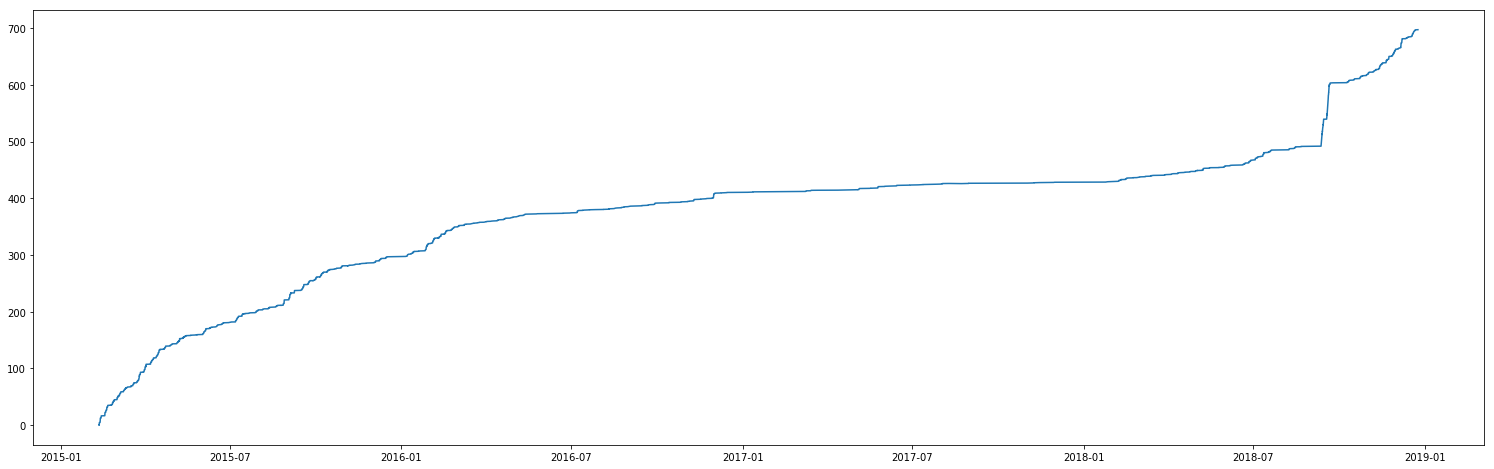

Buy Accuracy: 0.7430888315517877
Sell Accuracy: 0.8102150537634408
HL Sharpe: 28.053219


float32    1337
dtype: int64
float32    1337
dtype: int64
HL Results
Trade Pct Predicted HL: 0.05708092485549133
Trade Pct Actual Target HL 0.24855491329479767
Val Predictions P/L HL BEFORE FEES: -200.00000000004005
Val Predictions P/L HL AFTER FEES: -1306.00000000004
Val Class 4: 379.99999999998124
Val Class 3: 639.9999999999964
Val Class 1: -800.0000000000156
Val Class 0: -420.0000000000017


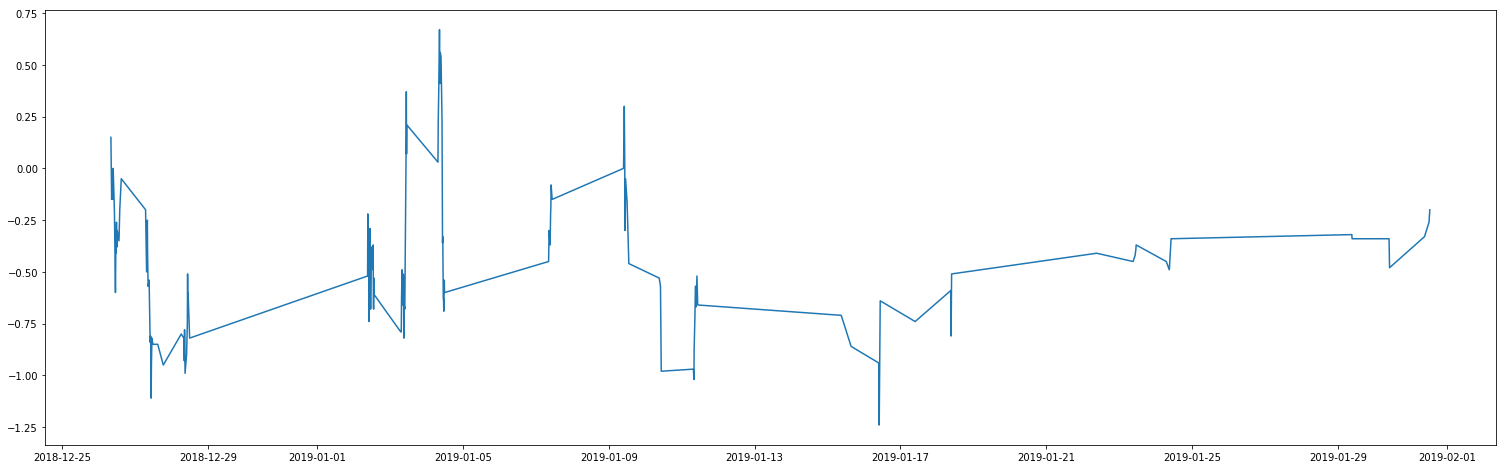

Buy Accuracy: 0.4827586206896552
Sell Accuracy: 0.35714285714285715
HL Sharpe: -0.03929191


float32    1337
dtype: int64
float32    1337
dtype: int64
HL Results
Trade Pct Predicted HL: 0.006459948320413436
Trade Pct Actual Target HL 0.13285960378983636
Test Predictions P/L HL BEFORE FEES: 39.999999999987935
Test Predictions P/L HL AFTER FEES: -170.00000000001205
Test Class 4: -30.000000000001137
Test Class 3: 309.99999999998965
Test Class 1: 69.9999999999946
Test Class 0: -309.99999999999517


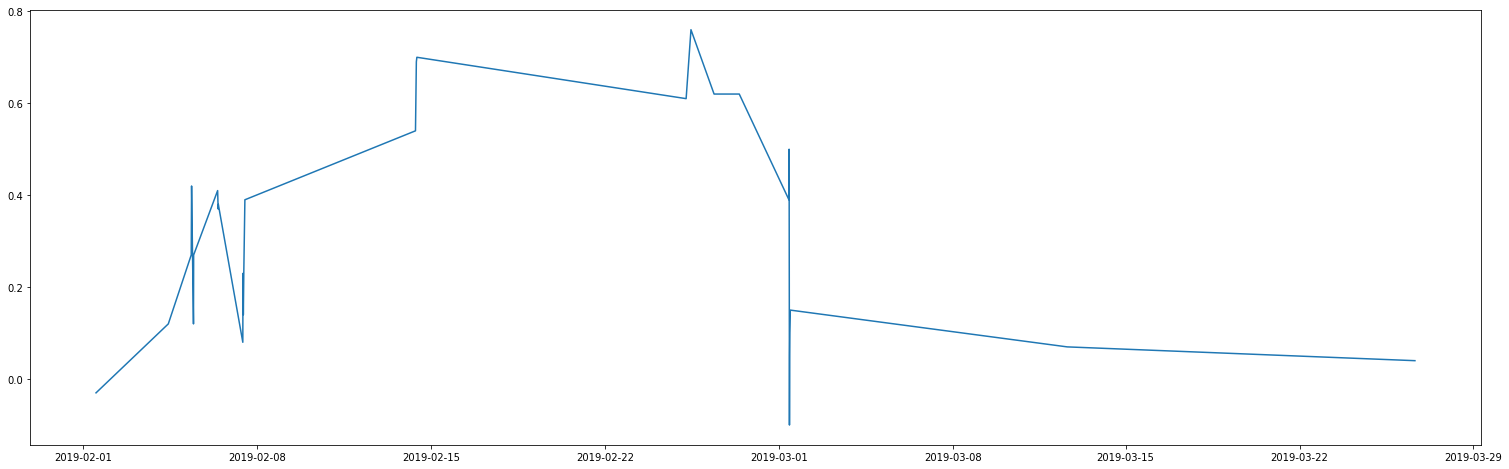

Buy Accuracy: 0.625
Sell Accuracy: 0.3333333333333333
HL Sharpe: 0.0183323




,Target_HL,Test Predictions,Actual10minHighMove,Actual10minLowMove,Actual10minMove,Test P/L HL
Datetime,,,,,,
2019-02-01 12:10:00-06:00,1.0,3.0,0.10,-0.22,-0.03,-0.03
2019-02-04 10:00:00-06:00,3.0,3.0,0.20,-0.02,0.19,0.15
2019-02-05 08:10:00-06:00,3.0,3.0,0.18,-0.03,0.10,0.15
2019-02-05 08:30:00-06:00,4.0,3.0,0.48,-0.03,0.35,0.15
2019-02-05 10:20:00-06:00,0.0,3.0,0.00,-0.46,-0.46,-0.30
2019-02-05 10:30:00-06:00,4.0,3.0,0.40,-0.02,0.28,0.15
2019-02-06 09:40:00-06:00,1.0,3.0,0.15,-0.18,0.14,0.14
2019-02-06 10:10:00-06:00,3.0,1.0,0.19,-0.06,0.04,-0.04
2019-02-06 10:20:00-06:00,2.0,3.0,0.14,-0.11,0.01,0.01


In [151]:
oversampled_model_HL = TrainModel(eval(config['MODEL']['model']),
                            X_train_scaled, y_train_HL, X_val_scaled, y_val_HL,
                            X_test_scaled, y_test_HL,
                            need_cont_vars=False,
                            plot_importances=False).train_traditional_ML_model()


CalcResults(oversampled_model_HL, X_train_scaled, y_train_HL, predictions='Train Predictions',
            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
            multiplier=multiplier, need_cont_vars=False,
            HL=True, NN=False).calc_results()
CalcResults(oversampled_model_HL, X_val_scaled, y_val_HL, predictions='Val Predictions',
            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
            multiplier=multiplier, need_cont_vars=False,
            HL=True, NN=False).calc_results()
CalcResults(oversampled_model_HL, X_test_scaled, y_test_HL, predictions='Test Predictions',
            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
            multiplier=multiplier, need_cont_vars=False,
            HL=True, NN=False).calc_results()

In [144]:
X_train_scaled.shape, X_val.shape, X_test.shape

((92833, 1337), (2768, 1202), (4644, 1202))

In [72]:
def main():

    # for setting all values to be either continuous or to have categorical variables
    if config['PARAMS']['need_cont_vars'] == 'TRUE':
        need_cont_vars_param = True
    elif config['PARAMS']['need_cont_vars'] == 'FALSE':
        need_cont_vars_param = False
    if config['PARAMS']['plot_importances'] == 'TRUE':
        plot_importances_param = True
    elif config['PARAMS']['plot_importances'] == 'FALSE':
        plot_importances_param = False

    # print(pd.concat([X_train, y_train_HL], axis=1))

    ####################################################
    #                   MODEL TRAINING
    ####################################################


    if config['PARAMS']['HL_ON'] == 'TRUE':

        if config['PARAMS']['RAW_ON'] == 'TRUE':

            # HL RAW
            raw_model = eval(config['MODEL']['model'])
            raw_model = raw_model.set_params(**eval(config['PARAMS']['raw_model_hyperparams_HL']))

            if config['PARAMS']['scale_ON'] == 'FALSE':

                print('******Running', type(raw_model).__name__, 'Raw-HL (not scaled)******')

                raw_model_HL = TrainModel(model=raw_model,
                                          X_train_fit=X_train, y_train_fit=y_train_HL, X_val_fit=X_val, y_val_fit=y_val_HL,
                                          X_test_unseen=X_test, y_test_unseen=y_test_HL,
                                          need_cont_vars=need_cont_vars_param,
                                          plot_importances=plot_importances_param).train_traditional_ML_model()


                CalcResults(model=raw_model_HL, X=X_train, y=y_train_HL, predictions='Train Predictions',
                            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                            multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                            HL=True, NN=False).calc_results()

                CalcResults(model=raw_model_HL, X=X_val, y=y_val_HL, predictions='Val Predictions',
                            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                            multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                            HL=True, NN=False).calc_results()

                CalcResults(model=raw_model_HL, X=X_test, y=y_test_HL, predictions='Test Predictions',
                            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                            multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                            HL=True, NN=False).calc_results()

            if config['PARAMS']['scale_ON'] == 'TRUE':

                print('******Running', type(raw_model).__name__, 'Raw-HL (not scaled)******')

                raw_model_HL = TrainModel(model=raw_model,
                                          X_train_fit=X_train_scaled, y_train_fit=y_train_HL, X_val_fit=X_val_scaled, y_val_fit=y_val_HL,
                                          X_test_unseen=X_test_scaled, y_test_unseen=y_test_HL,
                                          need_cont_vars=need_cont_vars_param,
                                          plot_importances=plot_importances_param).train_traditional_ML_model()


                CalcResults(model=raw_model_HL, X=X_train_scaled, y=y_train_HL, predictions='Train Predictions',
                            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                            multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                            HL=True, NN=False).calc_results()

                CalcResults(model=raw_model_HL, X=X_val_scaled, y=y_val_HL, predictions='Val Predictions',
                            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                            multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                            HL=True, NN=False).calc_results()

                CalcResults(model=raw_model_HL, X=X_test_scaled, y=y_test_HL, predictions='Test Predictions',
                            stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                            multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                            HL=True, NN=False).calc_results()



        if config['OVERSAMPLING_PARAMS']['OVERSAMPLED_ON'] == 'TRUE':

            # HL OverSampled

            if config['PARAMS']['scale_ON'] == 'FALSE':
                print('Applying OverSampling (not scaled)...')
                X_train_oversampled, X_val_oversampled, y_train_oversampled_HL, y_val_oversampled_HL = create_oversampled_df(X_train_fit=X_train, X_val_fit=X_val, HL=True, scaler=scaler, need_cont_vars=need_cont_vars_param, ratio=smote_ratio_param)
                print(X_train_oversampled.shape, X_val_oversampled.shape, y_train_oversampled_HL.shape, y_val_oversampled_HL.shape)

            elif config['PARAMS']['scale_ON'] == 'TRUE':
                print('Applying OverSampling (scaled first, then oversample)...')
                X_train_oversampled, X_val_oversampled, y_train_oversampled_HL, y_val_oversampled_HL = create_oversampled_df(X_train_fit=X_train_scaled, X_val_fit=X_val_scaled, HL=True, scaler=scaler, need_cont_vars=need_cont_vars_param, ratio=smote_ratio_param)
                print(X_train_oversampled.shape, X_val_oversampled.shape, y_train_oversampled_HL.shape, y_val_oversampled_HL.shape)

            elif config['OVERSAMPLING_PARAMS']['CREATE_OVERSAMPLED_DF_ON'] == 'FALSE':

                print("Using 'oversampled_read_df' HL as training data...")
                print('Reading OverSampled df...')

                if config['OVERSAMPLING_PARAMS']['read_feather'] == 'FALSE':
                    oversampled_df = pd.read_csv(config['PATH']['oversampled_read_df'])
                    try:
                        oversampled_df = oversampled_df.drop(['Unnamed: 0'], axis=1)
                    except KeyError:
                        pass
                elif config['OVERSAMPLING_PARAMS']['read_feather'] == 'TRUE':
                    oversampled_df = pd.read_feather(config['PATH']['oversampled_read_df'], use_threads=32)
                    try:
                        oversampled_df = oversampled_df.drop(['Unnamed: 0'], axis=1)
                    except KeyError:
                        pass


                X_train_oversampled = oversampled_df.iloc[0:int(len(oversampled_df)*.7)].fillna(0).drop('Target_HL', axis=1)
                X_val_oversampled = oversampled_df.iloc[int(len(oversampled_df)*.7):].fillna(0).drop('Target_HL', axis=1)
                y_train_oversampled_HL = oversampled_df['Target_HL'].iloc[0:int(len(oversampled_df)*.7)].fillna(2)
                y_val_oversampled_HL = oversampled_df['Target_HL'].iloc[int(len(oversampled_df)*.7):].fillna(2)

                if need_cont_vars_param == False:
                    print('Converting dtypes on OverSampled df...')
                    for col in [i for i in cat_vars if not 'Actual' in i]:
                        X_train_oversampled[col] = X_train_oversampled[col].astype('category').cat.as_ordered()
                        X_val_oversampled[col] = X_val_oversampled[col].astype('category').cat.as_ordered()
                    for col in [i for i in cont_vars if not 'Actual' in i]:
                        X_train_oversampled[col] = X_train_oversampled[col].astype('float32')
                        X_val_oversampled[col] = X_val_oversampled[col].astype('float32')

                print(X_train_oversampled.shape, X_val_oversampled.shape, y_train_oversampled_HL.shape, y_val_oversampled_HL.shape)


        ########################################################
            oversampled_model = eval(config['MODEL']['model'])
            oversampled_model = oversampled_model.set_params(**eval(config['PARAMS']['oversampled_model_hyperparams_HL']))
            model_name = str(oversampled_model)
            print('******Running', type(oversampled_model).__name__, 'OverSampled-HL******')

            oversampled_model_HL = TrainModel(oversampled_model,
                                        X_train_oversampled, y_train_oversampled_HL, X_val_oversampled, y_val_oversampled_HL,
                                        X_test, y_test_HL,
                                        need_cont_vars=need_cont_vars_param,
                                        plot_importances=plot_importances_param).train_traditional_ML_model()


            CalcResults(oversampled_model_HL, X_train, y_train_HL, predictions='Train Predictions',
                        stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=True, NN=False).calc_results()
            CalcResults(oversampled_model_HL, X_val, y_val_HL, predictions='Val Predictions',
                        stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=True, NN=False).calc_results()
            CalcResults(oversampled_model_HL, X_test, y_test_HL, predictions='Test Predictions',
                        stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=True, NN=False).calc_results()


    if config['PARAMS']['ACTUAL_ON'] == 'TRUE':

        if config['PARAMS']['RAW_ON'] == 'TRUE':

            # Actual RAW
            raw_model = eval(config['MODEL']['model'])
            raw_model = raw_model.set_params(**eval(config['PARAMS']['raw_model_hyperparams_ACTUAL']))
            model_name = str(raw_model)
            print('******Running', type(raw_model).__name__, 'Raw-Actual******')

            raw_model_actual = TrainModel(raw_model,
                                          X_train, y_train_actual, X_val, y_val_actual,
                                          X_test, y_test_actual,
                                          need_cont_vars=need_cont_vars_param,
                                          plot_importances=plot_importances_param).train_traditional_ML_model()


            CalcResults(model=raw_model_actual, X=X_train, y=y_train_actual, predictions='Train Predictions',
                        stop=stop_actual, strong_cap=strong_cap_actual, med_cap=med_cap_actual,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=False, NN=False).calc_results()

            CalcResults(model=raw_model_actual, X=X_val, y=y_val_actual, predictions='Val Predictions',
                        stop=stop_actual, strong_cap=strong_cap_actual, med_cap=med_cap_actual,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=False, NN=False).calc_results()

            CalcResults(model=raw_model_actual, X=X_test, y=y_test_actual, predictions='Test Predictions',
                        stop=stop_actual, strong_cap=strong_cap_actual, med_cap=med_cap_actual,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=False, NN=False).calc_results()

        if config['OVERSAMPLING_PARAMS']['OVERSAMPLED_ON'] == 'TRUE':
            # Actual SMOTE
            if config['OVERSAMPLING_PARAMS']['CREATE_OVERSAMPLED_DF_ON'] == 'TRUE':
                if config['PARAMS']['scale_ON'] == 'FALSE':
                    X_train_oversampled, X_val_oversampled, y_train_oversampled_actual, y_val_oversampled_actual = create_oversampled_df(X_train_fit=X_train, X_val_fit=X_val, HL=False, scaler=scaler, need_cont_vars=need_cont_vars_param, ratio=smote_ratio_param)
                    print(X_train_oversampled.shape, X_val_oversampled.shape, y_train_oversampled_actual.shape, y_val_oversampled_actual.shape)
                elif config['PARAMS']['scale_ON'] == 'TRUE':
                    X_train_oversampled, X_val_oversampled, y_train_oversampled_actual, y_val_oversampled_actual = create_oversampled_df(X_train_fit=X_train_scaled, X_val_fit=X_val_scaled, HL=False, scaler=scaler, need_cont_vars=need_cont_vars_param, ratio=smote_ratio_param)
                    print(X_train_oversampled.shape, X_val_oversampled.shape, y_train_oversampled_actual.shape, y_val_oversampled_actual.shape)

            elif config['OVERSAMPLING_PARAMS']['CREATE_OVERSAMPLED_DF_ON'] == 'FALSE':

                print("Using 'oversampled_read_df' ACTUAL-MOVE as training data...")
                print('Reading SMOTE df...')

                if config['OVERSAMPLING_PARAMS']['read_feather'] == 'FALSE':
                    oversampled_df = pd.read_csv(config['PATH']['oversampled_read_df'])
                    try:
                        oversampled_df = oversampled_df.drop(['Unnamed: 0'], axis=1)
                    except KeyError:
                        pass
                elif config['OVERSAMPLING_PARAMS']['read_feather'] == 'TRUE':
                    oversampled_df = pd.read_feather(config['PATH']['oversampled_read_df'], use_threads=32)
                    try:
                        oversampled_df = oversampled_df.drop(['Unnamed: 0'], axis=1)
                    except KeyError:
                        pass

                X_train_oversampled = oversampled_df.iloc[0:int(len(oversampled_df)*.7)].fillna(0).drop('Target_Actual', axis=1)
                X_val_oversampled = oversampled_df.iloc[int(len(oversampled_df)*.7):].fillna(0).drop('Target_Actual', axis=1)
                y_train_oversampled_actual = oversampled_df['Target_Actual'].iloc[0:int(len(oversampled_df)*.7)].fillna(2)
                y_val_oversampled_actual = oversampled_df['Target_Actual'].iloc[int(len(oversampled_df)*.7):].fillna(2)

                print(X_train_oversampled.shape, X_val_oversampled.shape, y_train_oversampled_actual.shape, y_val_oversampled_actual.shape)

            oversampled_model = eval(config['MODEL']['model'])
            oversampled_model = oversampled_model.set_params(**eval(config['PARAMS']['oversampled_model_hyperparams_ACTUAL']))
            model_name = str(oversampled_model)
            print('******Running', type(oversampled_model).__name__, 'Oversampled-Actual******')

            oversampled_model_actual = TrainModel(oversampled_model,
                                            X_train_oversampled, y_train_oversampled_actual, X_val_oversampled, y_val_oversampled_actual,
                                            X_test, y_test_actual,
                                            need_cont_vars=need_cont_vars_param,
                                            plot_importances=plot_importances_param).train_traditional_ML_model()

            CalcResults(oversampled_model_actual, X_train, y_train_actual, predictions='Train Predictions',
                        stop=stop_actual, strong_cap=strong_cap_actual, med_cap=med_cap_actual,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=False, NN=False).calc_results()
            CalcResults(oversampled_model_actual, X_val, y_val_actual, predictions='Val Predictions',
                        stop=stop_actual, strong_cap=strong_cap_actual, med_cap=med_cap_actual,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=False, NN=False).calc_results()
            CalcResults(oversampled_model_actual, X_test, y_test_actual, predictions='Test Predictions',
                        stop=stop_actual, strong_cap=strong_cap_actual, med_cap=med_cap_actual,
                        multiplier=multiplier, need_cont_vars=need_cont_vars_param,
                        HL=False, NN=False).calc_results()

    if config['PARAMS']['HL_ON'] == 'TRUE':
        if config['PARAMS']['RAW_ON'] == 'TRUE':
            print(config['PARAMS']['raw_model_hyperparams_HL'])
        if config['OVERSAMPLING_PARAMS']['OVERSAMPLED_ON'] == 'TRUE':
            print(config['PARAMS']['oversampled_model_hyperparams_HL'])
            print('strong_buy_HL:', strong_buy_HL)
            print('med_buy_HL:', med_buy_HL)
            print('no_trade_HL:', no_trade_HL)
            print('med_sell_HL:', med_sell_HL)
            print('strong_sell_HL:', strong_sell_HL)
            print('strong_cap_HL:', strong_cap_HL)
            print('med_cap_HL:', med_cap_HL)
            print('stop_HL:', stop_HL)

    if config['PARAMS']['ACTUAL_ON'] == 'TRUE':
        if config['PARAMS']['RAW_ON'] == 'TRUE':
            print(config['PARAMS']['raw_model_hyperparams_ACTUAL'])
        if config['OVERSAMPLING_PARAMS']['OVERSAMPLED_ON'] == 'TRUE':
            print(config['PARAMS']['oversampled_model_hyperparams_ACTUAL'])
            print('strong_buy_ACTUAL:', strong_buy_actual)
            print('med_buy_ACTUAL:', med_buy_actual)
            print('no_trade_ACTUAL:', no_trade_actual)
            print('med_sell_ACTUAL:', med_sell_actual)
            print('strong_sell_ACTUAL:', strong_sell_actual)
            print('strong_cap_ACTUAL:', strong_cap_actual)
            print('med_cap_ACTUAL:', med_cap_actual)
            print('stop_ACTUAL:', stop_actual)

    if config['PARAMS']['PredProb_ON'] == 'TRUE':
        print('PredProb_ON...')
        print('min_prob0', min_prob0)
        print('min_prob1', min_prob1)
        print('min_prob3', min_prob3)
        print('min_prob4', min_prob4)

    if config['PARAMS']['ACTUAL_ON'] == 'TRUE':
        if config['PARAMS']['RAW_ON'] == 'TRUE':
            print(config['PARAMS']['raw_model_hyperparams_ACTUAL'])
        if config['OVERSAMPLING_PARAMS']['CREATE_OVERSAMPLED_DF_ON'] == 'TRUE':
            print(config['PARAMS']['oversampled_model_hyperparams_ACTUAL'])


    try:
        # SAVE RAW
        if config['PARAMS']['save_raw_model'] == 'TRUE' and config['PARAMS']['RAW_ON'] == 'TRUE':
            if config['PARAMS']['HL_ON'] == 'TRUE':
                pickle.dump(raw_model_HL, open(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_RAW-HL_' + str(datetime.datetime.today().date()) + '.pickle.dat', 'wb'))
                # np.savetxt(config['PATH']['model_outpath'] + config['NAME']['product'] + model_name + '_RAW-HL_COLUMNS.txt', np.array(X_train.columns), fmt='%s', delimiter=',')
                X_train.to_csv(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_RAW-HL_X_train_' + str(datetime.datetime.today().date()) + '.csv')

            if config['PARAMS']['ACTUAL_ON'] == 'TRUE':
                pickle.dump(raw_model_actual, open(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_RAW-ACTUAL_' + str(datetime.datetime.today().date()) + '.pickle.dat', 'wb'))
                # np.savetxt(config['PATH']['model_outpath'] + config['NAME']['product'] + model_name + '_RAW-ACTUAL_COLUMNS.txt', np.array(X_train.columns), fmt='%s', delimiter=',')
                X_train.to_csv(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_RAW-ACTUAL_X_train_' + str(datetime.datetime.today().date()) + '.csv')


        # SAVE SMOTE
        if config['OVERSAMPLING_PARAMS']['save_oversampled_model'] == 'TRUE' and config['OVERSAMPLING_PARAMS']['OVERSAMPLED_ON'] == 'TRUE':
            if config['PARAMS']['HL_ON'] == 'TRUE':
                pickle.dump(oversampled_model_HL, open(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_oversampled-HL_' + str(datetime.datetime.today().date()) + '.pickle.dat', 'wb'))
                # np.savetxt(config['PATH']['model_outpath'] + config['NAME']['product'] + model_name + '_oversampled-HL_COLUMNS.txt', np.array(X_train.columns), fmt='%s', delimiter=',')
                X_train.to_csv(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_oversampled-HL_X_train_' + str(datetime.datetime.today().date()) + '.csv')

            if config['PARAMS']['ACTUAL_ON'] == 'TRUE':
                pickle.dump(oversampled_model_actual, open(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_oversampled-ACTUAL_' + str(datetime.datetime.today().date()) + '.pickle.dat', 'wb'))
                # np.savetxt(config['PATH']['model_outpath'] + config['NAME']['product'] + model_name + '_oversampled-ACTUAL_COLUMNS.txt', np.array(X_train.columns), fmt='%s', delimiter=',')
                X_train.to_csv(config['PATH']['model_outpath'] + config['NAME']['product'] + str(model_name)[0:4] + '_oversampled-ACTUAL_X_train_' + str(datetime.datetime.today().date()) + '.csv')

    except UnboundLocalError:
        raise("You probably didn't specify RAW_ON or OVERSAMPLED_ON in the config file.")

    return

In [67]:
# model = LGBMClassifier(n_jobs=32).fit(X_train_oversampled, y_train_oversampled.astype('int32'))

float32    1157
int32        45
dtype: int64
float32    1157
int32        45
dtype: int64
HL Results
Trade Pct Predicted HL: 0.05574526299914901
Trade Pct Actual Target HL 0.18595757973996316
Train Predictions P/L HL BEFORE FEES: 465209.99999999994
Train Predictions P/L HL AFTER FEES: 428984.99999999994
Train Class 4: 136220.00000000003
Train Class 3: 121789.99999999991
Train Class 1: 101960.00000000003
Train Class 0: 105239.99999999994


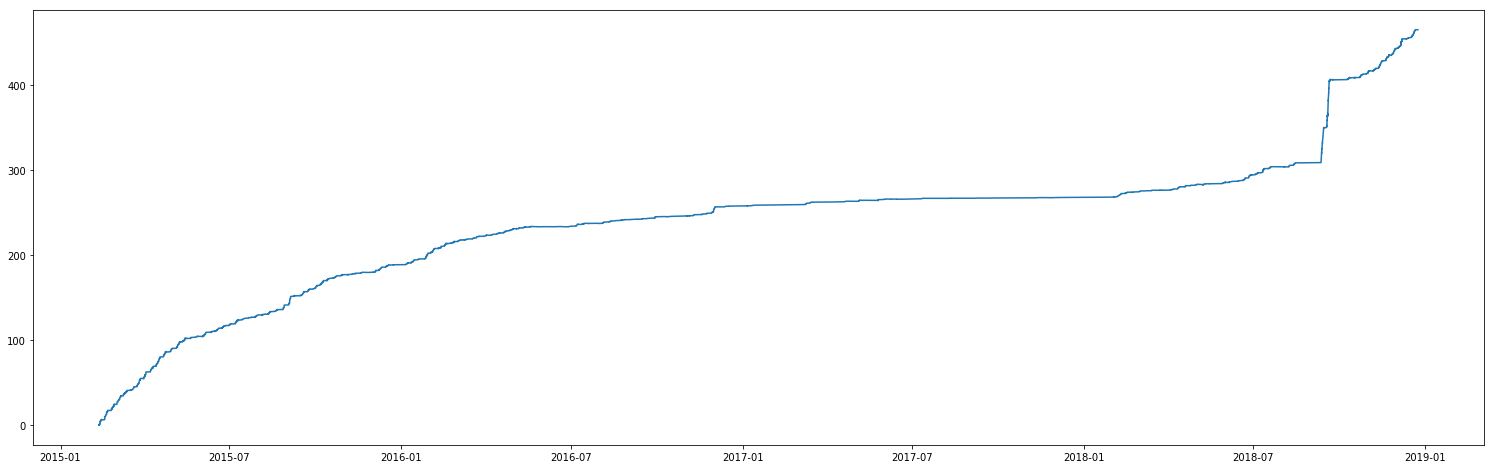

Buy Accuracy: 0.6469993256911666
Sell Accuracy: 0.6455409687641467
HL Sharpe: 16.251131


float32    1157
int32        45
dtype: int64
float32    1157
int32        45
dtype: int64
HL Results
Trade Pct Predicted HL: 0.09104046242774566
Trade Pct Actual Target HL 0.24855491329479767
Val Predictions P/L HL BEFORE FEES: 24429.999999999967
Val Predictions P/L HL AFTER FEES: 22665.999999999967
Val Class 4: 8009.999999999987
Val Class 3: 7040.000000000005
Val Class 1: 5029.999999999982
Val Class 0: 4349.999999999997


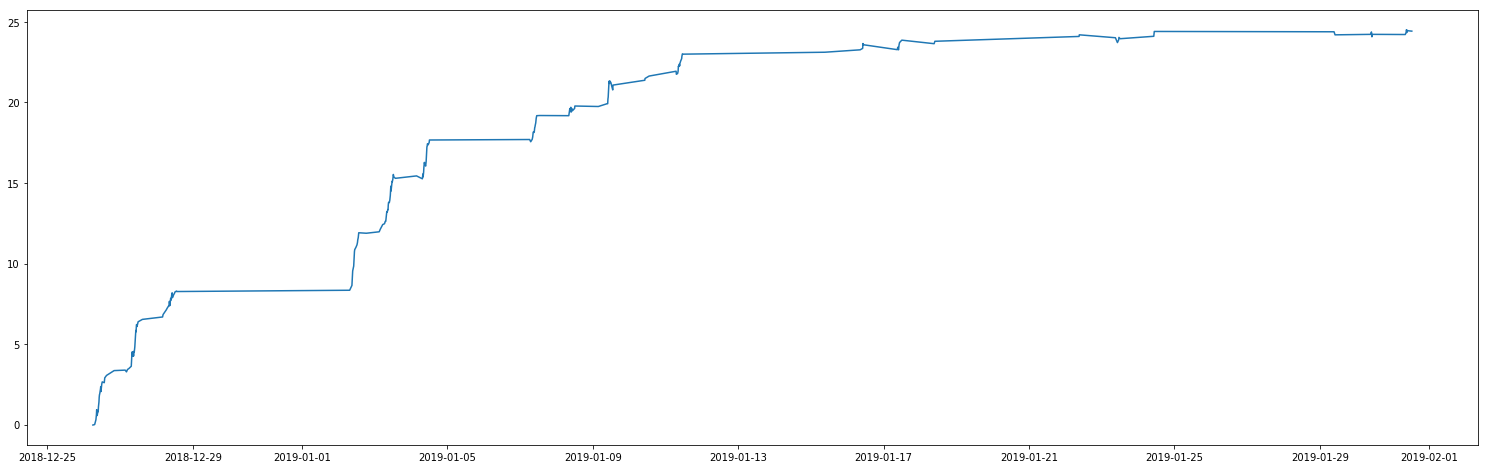

Buy Accuracy: 0.621301775147929
Sell Accuracy: 0.6987951807228916
HL Sharpe: 3.9362535


float32    1157
int32        45
dtype: int64
float32    1157
int32        45
dtype: int64
HL Results
Trade Pct Predicted HL: 0.009905254091300603
Trade Pct Actual Target HL 0.13285960378983636
Test Predictions P/L HL BEFORE FEES: -1639.9999999999877
Test Predictions P/L HL AFTER FEES: -1961.9999999999877
Test Class 4: -460.0000000000037
Test Class 3: 160.00000000000082
Test Class 1: -900.0000000000015
Test Class 0: -439.9999999999835


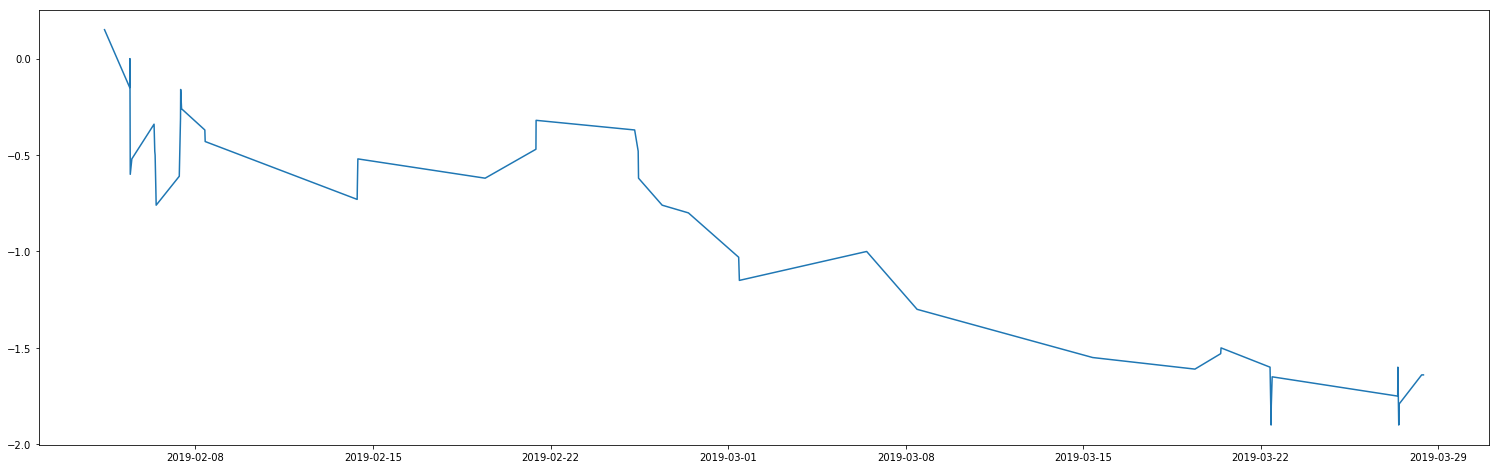

Buy Accuracy: 0.5161290322580645
Sell Accuracy: 0.2
HL Sharpe: -0.5885292




,Target_HL,Test Predictions,Actual10minHighMove,Actual10minLowMove,Actual10minMove,Test P/L HL
Datetime,,,,,,
2019-02-04 10:10:00-06:00,3.0,3.0,0.28,-0.09,0.15,0.15
2019-02-05 10:00:00-06:00,0.0,3.0,0.02,-0.42,-0.42,-0.30
2019-02-05 10:10:00-06:00,3.0,3.0,0.17,-0.09,0.17,0.15
2019-02-05 10:20:00-06:00,0.0,4.0,0.00,-0.46,-0.46,-0.30
2019-02-05 10:30:00-06:00,4.0,0.0,0.40,-0.02,0.28,-0.30
2019-02-05 12:00:00-06:00,3.0,0.0,0.16,-0.09,-0.08,0.08
2019-02-06 09:00:00-06:00,1.0,0.0,0.00,-0.20,-0.18,0.18
2019-02-06 09:40:00-06:00,1.0,0.0,0.15,-0.18,0.14,-0.14
2019-02-06 10:00:00-06:00,1.0,4.0,0.13,-0.15,-0.02,-0.02


In [70]:
# CalcResults(model=model, X=X_train_scaled, y=y_train_HL, predictions='Train Predictions',
#                         stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
#                         multiplier=multiplier, need_cont_vars=False,
#                         HL=True, NN=False).calc_results()

# CalcResults(model=model, X=X_val_scaled, y=y_val_HL, predictions='Val Predictions',
#             stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
#             multiplier=multiplier, need_cont_vars=False,
#             HL=True, NN=False).calc_results()

# CalcResults(model=model, X=X_test_scaled, y=y_test_HL, predictions='Test Predictions',
#             stop=stop_HL, strong_cap=strong_cap_HL, med_cap=med_cap_HL,
#             multiplier=multiplier, need_cont_vars=False,
#             HL=True, NN=False).calc_results()

In [73]:
if __name__ == '__main__':
    p = Process(target=main)
    p.start()
    p.join()
    print('Script took:', time.time() - start_time, 'seconds')


Applying OverSampling (scaled first, then oversample)...


Process Process-2:
Traceback (most recent call last):
  File "/home/melgazar9/anaconda3/envs/lgbm-gpu/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/melgazar9/anaconda3/envs/lgbm-gpu/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-72-3d348b8c60ce>", line 93, in main
    X_train_oversampled, X_val_oversampled, y_train_oversampled_HL, y_val_oversampled_HL = create_oversampled_df(X_train_fit=X_train_scaled, X_val_fit=X_val_scaled, HL=True, scaler=scaler, need_cont_vars=need_cont_vars_param, ratio=smote_ratio_param)
NameError: name 'scaler' is not defined


Script took: 2136.086735010147 seconds
